In [4]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

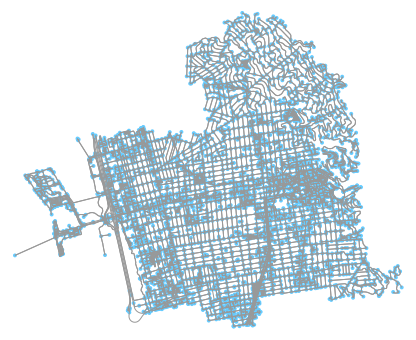

In [5]:
graph = ox.graph_from_place('Berkeley, Alameda County, California, USA')
fig, ax = ox.plot_graph(graph)

In [6]:
nodes, edges = ox.graph_to_gdfs(graph)

In [7]:
df = nx.from_pandas_edgelist(edges, source='u', target = 'v', edge_attr=True)

In [8]:
shortest_path_distance = nx.dijkstra_path(df, source=1762740812, target=4927326194, weight = 'length')

In [9]:
shortest_path_distance

[1762740812,
 1762740819,
 53063533,
 240469773,
 53050617,
 1762740780,
 1762740772,
 1762740779,
 53047348,
 53063531,
 1762740760,
 1762740752,
 1762740759,
 53063527,
 53063524,
 53029050,
 53063523,
 243673107,
 5484498093,
 243673110,
 5484498200,
 243673112,
 53130824,
 5484498208,
 5484498212,
 5484498214,
 53130826,
 4168148272,
 53105539,
 4924539070,
 5483224502,
 53030281,
 2908411319,
 1762740918,
 5483224513,
 5483224515,
 240448878,
 6344498986,
 5483224539,
 6344498577,
 240448876,
 4028652541,
 240448874,
 240448872,
 240448903,
 258758045,
 240448868,
 1635557749,
 1635557748,
 52995542,
 86333300,
 1800890503,
 86333294,
 306067373,
 306067367,
 306067387,
 306067426,
 306067445,
 4927326218,
 53119001,
 813905784,
 4927326214,
 4927326195,
 4927326193,
 361213403,
 4927326194]

In [10]:
def check_if_is_in(target_list, u, v):
    for i in range(len(target_list)):
        try:
            if u==target_list[i] and v==target_list[i+1]:
                return True
        except IndexError:
            break
    return False

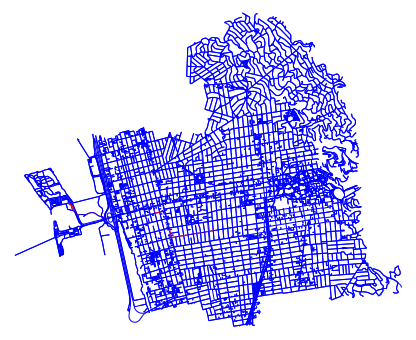

<Figure size 432x288 with 0 Axes>

In [12]:
ec = ['r' if (check_if_is_in(shortest_path_distance, u, v)) else 'b' for u, v, k in graph.edges(keys=True)]
fig, ax = ox.plot_graph(graph, node_color='w', node_edgecolor='k', node_size=0, node_zorder=0, edge_color=ec, edge_linewidth=1)
plt.tight_layout()

In [131]:
# edges is our main df
edges['Crime'] = 0

In [133]:
#edges = edges.drop(['area', 'bridge', 'highway', 'junction', 'lanes', 'maxspeed', 'ref', 'service'], axis=1)
edges.head()
#edges = edges.drop(['ref', 'service', 'tunnel'], axis=1)


,access,geometry,key,length,name,oneway,osmid,tunnel,u,v,width,Crime
0,NaN,"LINESTRING (-122.2670245 37.8598805, -122.2670...",0,15.035,Shattuck Avenue,False,22372750,NaN,275775499,4168189929,NaN,0
1,NaN,"LINESTRING (-122.2670245 37.8598805, -122.2670...",0,19.192,Shattuck Avenue,False,22372750,NaN,275775499,53090184,NaN,0
2,NaN,"LINESTRING (-122.2726539 37.8884334, -122.2727...",0,16.214,NaN,False,185454959,NaN,348192780,1960546508,NaN,0
3,NaN,"LINESTRING (-122.2726539 37.8884334, -122.2725...",0,6.946,Hopkins Street,False,234074080,NaN,348192780,266712196,NaN,0
4,NaN,"LINESTRING (-122.2726539 37.8884334, -122.2726...",0,5.638,Hopkins Street,False,234074080,NaN,348192780,239669483,NaN,0


In [134]:
crime = pd.read_csv('crime.csv')

In [135]:
crime

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,19044228,ASSAULT/BATTERY MISD.,08/10/2019 12:00:00 AM,22:51,ASSAULT,6,09/11/2019 08:05:05 AM,"UNIVERSITY AVENUE &FRONTAGE\nBerkeley, CA",UNIVERSITY AVENUE &FRONTAGE,Berkeley,CA
1,19036434,BRANDISHING,07/05/2019 12:00:00 AM,04:31,WEAPONS OFFENSE,5,09/11/2019 08:04:32 AM,"1700 WARD ST\nBerkeley, CA\n(37.858392, -122.2...",1700 WARD ST,Berkeley,CA
2,19047463,ROBBERY,08/25/2019 12:00:00 AM,12:50,ROBBERY,0,09/11/2019 08:05:24 AM,"2100 MARTIN LUTHER KING JR\nBerkeley, CA\n(37....",2100 MARTIN LUTHER KING JR,Berkeley,CA
3,19028725,ROBBERY,05/26/2019 12:00:00 AM,16:45,ROBBERY,0,09/11/2019 08:03:57 AM,"1900 SHATTUCK AV\nBerkeley, CA\n(37.873687, -1...",1900 SHATTUCK AV,Berkeley,CA
4,19047366,SEXUAL ASSAULT MISD.,08/24/2019 12:00:00 AM,23:45,SEX CRIME,6,09/11/2019 08:05:20 AM,"2000 BERKELEY WY\nBerkeley, CA\n(37.872691, -1...",2000 BERKELEY WY,Berkeley,CA
5,19033320,ROBBERY,06/18/2019 12:00:00 AM,15:49,ROBBERY,2,09/11/2019 08:04:15 AM,"2800 ADELINE ST\nBerkeley, CA\n(37.858116, -12...",2800 ADELINE ST,Berkeley,CA
6,19044216,NARCOTICS,08/10/2019 12:00:00 AM,22:00,DRUG VIOLATION,6,09/11/2019 08:05:07 AM,"MARKET STREET & STANFORD AV\nBerkeley, CA",MARKET STREET & STANFORD AV,Berkeley,CA
7,19018133,DISTURBANCE,04/05/2019 12:00:00 AM,16:34,DISORDERLY CONDUCT,5,09/11/2019 08:03:12 AM,"2000 SAN PABLO AV\nBerkeley, CA\n(37.868815, -...",2000 SAN PABLO AV,Berkeley,CA
8,19016495,ASSAULT/BATTERY MISD.,03/28/2019 12:00:00 AM,01:00,ASSAULT,4,09/11/2019 08:03:07 AM,"1100 8TH ST\nBerkeley, CA\n(37.882258, -122.29...",1100 8TH ST,Berkeley,CA
9,19034899,ASSAULT/BATTERY FEL.,06/26/2019 12:00:00 AM,17:50,ASSAULT,3,09/11/2019 08:04:18 AM,"2900 SACRAMENTO ST\nBerkeley, CA\n(37.8549, -1...",2900 SACRAMENTO ST,Berkeley,CA


In [136]:
crime_list = crime['Block_Location'].tolist()

In [137]:
crime_list_coords = []
crime_list

['UNIVERSITY AVENUE &FRONTAGE\nBerkeley, CA',
 '1700 WARD ST\nBerkeley, CA\n(37.858392, -122.275421)',
 '2100 MARTIN LUTHER KING JR\nBerkeley, CA\n(37.869688, -122.272805)',
 '1900 SHATTUCK AV\nBerkeley, CA\n(37.873687, -122.268616)',
 '2000 BERKELEY WY\nBerkeley, CA\n(37.872691, -122.270741)',
 '2800 ADELINE ST\nBerkeley, CA\n(37.858116, -122.268002)',
 'MARKET STREET & STANFORD AV\nBerkeley, CA',
 '2000 SAN PABLO AV\nBerkeley, CA\n(37.868815, -122.292131)',
 '1100 8TH ST\nBerkeley, CA\n(37.882258, -122.299991)',
 '2900 SACRAMENTO ST\nBerkeley, CA\n(37.8549, -122.27945)',
 'SAN PABLO AV & CEDAR ST\nBerkeley, CA\n(37.875218, -122.294052)',
 '2100 SHATTUCK AV\nBerkeley, CA\n(37.871167, -122.268285)',
 'SAN PABLO AV & UNIVERSITY AV\nBerkeley, CA\n(37.869041, -122.292204)',
 '1900 ESSEX ST\nBerkeley, CA\n(37.85344, -122.269182)',
 '800 UNIVERSITY AV\nBerkeley, CA\n(37.86771, -122.298466)',
 '1900 SHATTUCK AV\nBerkeley, CA\n(37.873687, -122.268616)',
 'EASTSHORE HW & GILMAN ST\nBerkeley, C

In [139]:
for adr in crime_list:
    try:
        cut = adr[adr.index('(')+1:]
        x = float(cut[:cut.index(',')])
        y = float(cut[cut.index(',') + 2 : cut.index(')')])
        crime_list_coords.append((x,y))
    except ValueError:
        pass
crime_list_coords
    

[(37.858392, -122.275421),
 (37.869688, -122.272805),
 (37.873687, -122.268616),
 (37.872691, -122.270741),
 (37.858116, -122.268002),
 (37.868815, -122.292131),
 (37.882258, -122.299991),
 (37.8549, -122.27945),
 (37.875218, -122.294052),
 (37.871167, -122.268285),
 (37.869041, -122.292204),
 (37.85344, -122.269182),
 (37.86771, -122.298466),
 (37.873687, -122.268616),
 (37.878312, -122.306543),
 (37.882071, -122.281161),
 (37.867852, -122.258699),
 (37.867822, -122.266003),
 (37.871318, -122.275278),
 (37.859309, -122.259291),
 (37.862781, -122.269376),
 (37.869688, -122.272805),
 (37.868204, -122.270054),
 (37.868714, -122.259189),
 (37.862938, -122.274352),
 (37.889399, -122.262594),
 (37.872992, -122.295801),
 (37.869363, -122.268028),
 (37.870603, -122.270612),
 (37.855954, -122.254022),
 (37.880468, -122.295876),
 (37.871246, -122.274991),
 (37.864173, -122.258616),
 (37.896648, -122.277424),
 (37.871246, -122.274991),
 (37.884969, -122.30003),
 (37.871317, -122.286575),
 (37.84

In [140]:
num = len(crime_list_coords)
i = 1
crime_nodes = []
for coords in crime_list_coords:
    crime_nodes.append(ox.utils.get_nearest_edge(graph, coords))
    print(str(i) + ' out of ' + str(num))
    i += 1

1 out of 965
2 out of 965
3 out of 965
4 out of 965
5 out of 965
6 out of 965
7 out of 965
8 out of 965
9 out of 965
10 out of 965
11 out of 965
12 out of 965
13 out of 965
14 out of 965


KeyboardInterrupt: 

In [100]:
list_of_edges = edges['geometry'].tolist()
list_of_edges

 ...]

In [145]:
import csv
with open('crime_berk.csv', 'r') as f:
    reader = csv.reader(f)
    crime_nodes = list(reader)
crime_nodes

[['(<shapely.geometry.linestring.LineString object at 0x0000016B135A0240>, 5484498021, 53076878)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B10FF9EB8>, 57066394, 3516414498)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B0FB19940>, 239616965, 2362882013)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B0EEBC2B0>, 53042661, 56856544)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B10D8CB70>, 275782472, 4044850417)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B10FDF048>, 240448882, 3720819935)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B111624A8>, 5483072641, 53098211)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B103D1588>, 240469627, 53050629)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B0F8682B0>, 53019122, 240448968)'],
 ['(<shapely.geometry.linestring.LineString object at 0x0000016B02C7E278>, 53096083, 53050568)'],
 ['

In [107]:
import csv
csvfile = "crime_berk.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in crime_nodes:
        writer.writerow([val])    

In [108]:
csvfile = "all_edges.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in list_of_edges:
        writer.writerow([val])   

In [158]:
# If Loaded
for i in range(edges.shape[0]):
    print(str(i) + ' out of ' + str(edges.shape[0]))
    for j in range(len(crime_nodes)):
        original = crime_nodes[j][0]
        cut = original[original.index(',') + 2:]
        try:
            if edges.at[i, 'u'] == int(cut[:cut.index(',')]) and edges.at[i, 'v'] == int(cut[cut.index(',') + 2: 
                                                                                             cut.index(')')]):
                edges.at[i, 'Crime'] = edges.at[i, 'Crime'] + 1     
        except:
            pass
edges

0 out of 59176
1 out of 59176
2 out of 59176
3 out of 59176
4 out of 59176
5 out of 59176
6 out of 59176
7 out of 59176
8 out of 59176
9 out of 59176
10 out of 59176
11 out of 59176
12 out of 59176
13 out of 59176
14 out of 59176
15 out of 59176
16 out of 59176
17 out of 59176
18 out of 59176
19 out of 59176
20 out of 59176
21 out of 59176
22 out of 59176
23 out of 59176
24 out of 59176
25 out of 59176
26 out of 59176
27 out of 59176
28 out of 59176
29 out of 59176
30 out of 59176
31 out of 59176
32 out of 59176
33 out of 59176
34 out of 59176
35 out of 59176
36 out of 59176
37 out of 59176
38 out of 59176
39 out of 59176
40 out of 59176
41 out of 59176
42 out of 59176
43 out of 59176
44 out of 59176
45 out of 59176
46 out of 59176
47 out of 59176
48 out of 59176
49 out of 59176
50 out of 59176
51 out of 59176
52 out of 59176
53 out of 59176
54 out of 59176
55 out of 59176
56 out of 59176
57 out of 59176
58 out of 59176
59 out of 59176
60 out of 59176
61 out of 59176
62 out of 59176
63

493 out of 59176
494 out of 59176
495 out of 59176
496 out of 59176
497 out of 59176
498 out of 59176
499 out of 59176
500 out of 59176
501 out of 59176
502 out of 59176
503 out of 59176
504 out of 59176
505 out of 59176
506 out of 59176
507 out of 59176
508 out of 59176
509 out of 59176
510 out of 59176
511 out of 59176
512 out of 59176
513 out of 59176
514 out of 59176
515 out of 59176
516 out of 59176
517 out of 59176
518 out of 59176
519 out of 59176
520 out of 59176
521 out of 59176
522 out of 59176
523 out of 59176
524 out of 59176
525 out of 59176
526 out of 59176
527 out of 59176
528 out of 59176
529 out of 59176
530 out of 59176
531 out of 59176
532 out of 59176
533 out of 59176
534 out of 59176
535 out of 59176
536 out of 59176
537 out of 59176
538 out of 59176
539 out of 59176
540 out of 59176
541 out of 59176
542 out of 59176
543 out of 59176
544 out of 59176
545 out of 59176
546 out of 59176
547 out of 59176
548 out of 59176
549 out of 59176
550 out of 59176
551 out of 591

992 out of 59176
993 out of 59176
994 out of 59176
995 out of 59176
996 out of 59176
997 out of 59176
998 out of 59176
999 out of 59176
1000 out of 59176
1001 out of 59176
1002 out of 59176
1003 out of 59176
1004 out of 59176
1005 out of 59176
1006 out of 59176
1007 out of 59176
1008 out of 59176
1009 out of 59176
1010 out of 59176
1011 out of 59176
1012 out of 59176
1013 out of 59176
1014 out of 59176
1015 out of 59176
1016 out of 59176
1017 out of 59176
1018 out of 59176
1019 out of 59176
1020 out of 59176
1021 out of 59176
1022 out of 59176
1023 out of 59176
1024 out of 59176
1025 out of 59176
1026 out of 59176
1027 out of 59176
1028 out of 59176
1029 out of 59176
1030 out of 59176
1031 out of 59176
1032 out of 59176
1033 out of 59176
1034 out of 59176
1035 out of 59176
1036 out of 59176
1037 out of 59176
1038 out of 59176
1039 out of 59176
1040 out of 59176
1041 out of 59176
1042 out of 59176
1043 out of 59176
1044 out of 59176
1045 out of 59176
1046 out of 59176
1047 out of 59176


1470 out of 59176
1471 out of 59176
1472 out of 59176
1473 out of 59176
1474 out of 59176
1475 out of 59176
1476 out of 59176
1477 out of 59176
1478 out of 59176
1479 out of 59176
1480 out of 59176
1481 out of 59176
1482 out of 59176
1483 out of 59176
1484 out of 59176
1485 out of 59176
1486 out of 59176
1487 out of 59176
1488 out of 59176
1489 out of 59176
1490 out of 59176
1491 out of 59176
1492 out of 59176
1493 out of 59176
1494 out of 59176
1495 out of 59176
1496 out of 59176
1497 out of 59176
1498 out of 59176
1499 out of 59176
1500 out of 59176
1501 out of 59176
1502 out of 59176
1503 out of 59176
1504 out of 59176
1505 out of 59176
1506 out of 59176
1507 out of 59176
1508 out of 59176
1509 out of 59176
1510 out of 59176
1511 out of 59176
1512 out of 59176
1513 out of 59176
1514 out of 59176
1515 out of 59176
1516 out of 59176
1517 out of 59176
1518 out of 59176
1519 out of 59176
1520 out of 59176
1521 out of 59176
1522 out of 59176
1523 out of 59176
1524 out of 59176
1525 out o

1979 out of 59176
1980 out of 59176
1981 out of 59176
1982 out of 59176
1983 out of 59176
1984 out of 59176
1985 out of 59176
1986 out of 59176
1987 out of 59176
1988 out of 59176
1989 out of 59176
1990 out of 59176
1991 out of 59176
1992 out of 59176
1993 out of 59176
1994 out of 59176
1995 out of 59176
1996 out of 59176
1997 out of 59176
1998 out of 59176
1999 out of 59176
2000 out of 59176
2001 out of 59176
2002 out of 59176
2003 out of 59176
2004 out of 59176
2005 out of 59176
2006 out of 59176
2007 out of 59176
2008 out of 59176
2009 out of 59176
2010 out of 59176
2011 out of 59176
2012 out of 59176
2013 out of 59176
2014 out of 59176
2015 out of 59176
2016 out of 59176
2017 out of 59176
2018 out of 59176
2019 out of 59176
2020 out of 59176
2021 out of 59176
2022 out of 59176
2023 out of 59176
2024 out of 59176
2025 out of 59176
2026 out of 59176
2027 out of 59176
2028 out of 59176
2029 out of 59176
2030 out of 59176
2031 out of 59176
2032 out of 59176
2033 out of 59176
2034 out o

2448 out of 59176
2449 out of 59176
2450 out of 59176
2451 out of 59176
2452 out of 59176
2453 out of 59176
2454 out of 59176
2455 out of 59176
2456 out of 59176
2457 out of 59176
2458 out of 59176
2459 out of 59176
2460 out of 59176
2461 out of 59176
2462 out of 59176
2463 out of 59176
2464 out of 59176
2465 out of 59176
2466 out of 59176
2467 out of 59176
2468 out of 59176
2469 out of 59176
2470 out of 59176
2471 out of 59176
2472 out of 59176
2473 out of 59176
2474 out of 59176
2475 out of 59176
2476 out of 59176
2477 out of 59176
2478 out of 59176
2479 out of 59176
2480 out of 59176
2481 out of 59176
2482 out of 59176
2483 out of 59176
2484 out of 59176
2485 out of 59176
2486 out of 59176
2487 out of 59176
2488 out of 59176
2489 out of 59176
2490 out of 59176
2491 out of 59176
2492 out of 59176
2493 out of 59176
2494 out of 59176
2495 out of 59176
2496 out of 59176
2497 out of 59176
2498 out of 59176
2499 out of 59176
2500 out of 59176
2501 out of 59176
2502 out of 59176
2503 out o

2961 out of 59176
2962 out of 59176
2963 out of 59176
2964 out of 59176
2965 out of 59176
2966 out of 59176
2967 out of 59176
2968 out of 59176
2969 out of 59176
2970 out of 59176
2971 out of 59176
2972 out of 59176
2973 out of 59176
2974 out of 59176
2975 out of 59176
2976 out of 59176
2977 out of 59176
2978 out of 59176
2979 out of 59176
2980 out of 59176
2981 out of 59176
2982 out of 59176
2983 out of 59176
2984 out of 59176
2985 out of 59176
2986 out of 59176
2987 out of 59176
2988 out of 59176
2989 out of 59176
2990 out of 59176
2991 out of 59176
2992 out of 59176
2993 out of 59176
2994 out of 59176
2995 out of 59176
2996 out of 59176
2997 out of 59176
2998 out of 59176
2999 out of 59176
3000 out of 59176
3001 out of 59176
3002 out of 59176
3003 out of 59176
3004 out of 59176
3005 out of 59176
3006 out of 59176
3007 out of 59176
3008 out of 59176
3009 out of 59176
3010 out of 59176
3011 out of 59176
3012 out of 59176
3013 out of 59176
3014 out of 59176
3015 out of 59176
3016 out o

3457 out of 59176
3458 out of 59176
3459 out of 59176
3460 out of 59176
3461 out of 59176
3462 out of 59176
3463 out of 59176
3464 out of 59176
3465 out of 59176
3466 out of 59176
3467 out of 59176
3468 out of 59176
3469 out of 59176
3470 out of 59176
3471 out of 59176
3472 out of 59176
3473 out of 59176
3474 out of 59176
3475 out of 59176
3476 out of 59176
3477 out of 59176
3478 out of 59176
3479 out of 59176
3480 out of 59176
3481 out of 59176
3482 out of 59176
3483 out of 59176
3484 out of 59176
3485 out of 59176
3486 out of 59176
3487 out of 59176
3488 out of 59176
3489 out of 59176
3490 out of 59176
3491 out of 59176
3492 out of 59176
3493 out of 59176
3494 out of 59176
3495 out of 59176
3496 out of 59176
3497 out of 59176
3498 out of 59176
3499 out of 59176
3500 out of 59176
3501 out of 59176
3502 out of 59176
3503 out of 59176
3504 out of 59176
3505 out of 59176
3506 out of 59176
3507 out of 59176
3508 out of 59176
3509 out of 59176
3510 out of 59176
3511 out of 59176
3512 out o

3917 out of 59176
3918 out of 59176
3919 out of 59176
3920 out of 59176
3921 out of 59176
3922 out of 59176
3923 out of 59176
3924 out of 59176
3925 out of 59176
3926 out of 59176
3927 out of 59176
3928 out of 59176
3929 out of 59176
3930 out of 59176
3931 out of 59176
3932 out of 59176
3933 out of 59176
3934 out of 59176
3935 out of 59176
3936 out of 59176
3937 out of 59176
3938 out of 59176
3939 out of 59176
3940 out of 59176
3941 out of 59176
3942 out of 59176
3943 out of 59176
3944 out of 59176
3945 out of 59176
3946 out of 59176
3947 out of 59176
3948 out of 59176
3949 out of 59176
3950 out of 59176
3951 out of 59176
3952 out of 59176
3953 out of 59176
3954 out of 59176
3955 out of 59176
3956 out of 59176
3957 out of 59176
3958 out of 59176
3959 out of 59176
3960 out of 59176
3961 out of 59176
3962 out of 59176
3963 out of 59176
3964 out of 59176
3965 out of 59176
3966 out of 59176
3967 out of 59176
3968 out of 59176
3969 out of 59176
3970 out of 59176
3971 out of 59176
3972 out o

4432 out of 59176
4433 out of 59176
4434 out of 59176
4435 out of 59176
4436 out of 59176
4437 out of 59176
4438 out of 59176
4439 out of 59176
4440 out of 59176
4441 out of 59176
4442 out of 59176
4443 out of 59176
4444 out of 59176
4445 out of 59176
4446 out of 59176
4447 out of 59176
4448 out of 59176
4449 out of 59176
4450 out of 59176
4451 out of 59176
4452 out of 59176
4453 out of 59176
4454 out of 59176
4455 out of 59176
4456 out of 59176
4457 out of 59176
4458 out of 59176
4459 out of 59176
4460 out of 59176
4461 out of 59176
4462 out of 59176
4463 out of 59176
4464 out of 59176
4465 out of 59176
4466 out of 59176
4467 out of 59176
4468 out of 59176
4469 out of 59176
4470 out of 59176
4471 out of 59176
4472 out of 59176
4473 out of 59176
4474 out of 59176
4475 out of 59176
4476 out of 59176
4477 out of 59176
4478 out of 59176
4479 out of 59176
4480 out of 59176
4481 out of 59176
4482 out of 59176
4483 out of 59176
4484 out of 59176
4485 out of 59176
4486 out of 59176
4487 out o

4949 out of 59176
4950 out of 59176
4951 out of 59176
4952 out of 59176
4953 out of 59176
4954 out of 59176
4955 out of 59176
4956 out of 59176
4957 out of 59176
4958 out of 59176
4959 out of 59176
4960 out of 59176
4961 out of 59176
4962 out of 59176
4963 out of 59176
4964 out of 59176
4965 out of 59176
4966 out of 59176
4967 out of 59176
4968 out of 59176
4969 out of 59176
4970 out of 59176
4971 out of 59176
4972 out of 59176
4973 out of 59176
4974 out of 59176
4975 out of 59176
4976 out of 59176
4977 out of 59176
4978 out of 59176
4979 out of 59176
4980 out of 59176
4981 out of 59176
4982 out of 59176
4983 out of 59176
4984 out of 59176
4985 out of 59176
4986 out of 59176
4987 out of 59176
4988 out of 59176
4989 out of 59176
4990 out of 59176
4991 out of 59176
4992 out of 59176
4993 out of 59176
4994 out of 59176
4995 out of 59176
4996 out of 59176
4997 out of 59176
4998 out of 59176
4999 out of 59176
5000 out of 59176
5001 out of 59176
5002 out of 59176
5003 out of 59176
5004 out o

5447 out of 59176
5448 out of 59176
5449 out of 59176
5450 out of 59176
5451 out of 59176
5452 out of 59176
5453 out of 59176
5454 out of 59176
5455 out of 59176
5456 out of 59176
5457 out of 59176
5458 out of 59176
5459 out of 59176
5460 out of 59176
5461 out of 59176
5462 out of 59176
5463 out of 59176
5464 out of 59176
5465 out of 59176
5466 out of 59176
5467 out of 59176
5468 out of 59176
5469 out of 59176
5470 out of 59176
5471 out of 59176
5472 out of 59176
5473 out of 59176
5474 out of 59176
5475 out of 59176
5476 out of 59176
5477 out of 59176
5478 out of 59176
5479 out of 59176
5480 out of 59176
5481 out of 59176
5482 out of 59176
5483 out of 59176
5484 out of 59176
5485 out of 59176
5486 out of 59176
5487 out of 59176
5488 out of 59176
5489 out of 59176
5490 out of 59176
5491 out of 59176
5492 out of 59176
5493 out of 59176
5494 out of 59176
5495 out of 59176
5496 out of 59176
5497 out of 59176
5498 out of 59176
5499 out of 59176
5500 out of 59176
5501 out of 59176
5502 out o

5913 out of 59176
5914 out of 59176
5915 out of 59176
5916 out of 59176
5917 out of 59176
5918 out of 59176
5919 out of 59176
5920 out of 59176
5921 out of 59176
5922 out of 59176
5923 out of 59176
5924 out of 59176
5925 out of 59176
5926 out of 59176
5927 out of 59176
5928 out of 59176
5929 out of 59176
5930 out of 59176
5931 out of 59176
5932 out of 59176
5933 out of 59176
5934 out of 59176
5935 out of 59176
5936 out of 59176
5937 out of 59176
5938 out of 59176
5939 out of 59176
5940 out of 59176
5941 out of 59176
5942 out of 59176
5943 out of 59176
5944 out of 59176
5945 out of 59176
5946 out of 59176
5947 out of 59176
5948 out of 59176
5949 out of 59176
5950 out of 59176
5951 out of 59176
5952 out of 59176
5953 out of 59176
5954 out of 59176
5955 out of 59176
5956 out of 59176
5957 out of 59176
5958 out of 59176
5959 out of 59176
5960 out of 59176
5961 out of 59176
5962 out of 59176
5963 out of 59176
5964 out of 59176
5965 out of 59176
5966 out of 59176
5967 out of 59176
5968 out o

6436 out of 59176
6437 out of 59176
6438 out of 59176
6439 out of 59176
6440 out of 59176
6441 out of 59176
6442 out of 59176
6443 out of 59176
6444 out of 59176
6445 out of 59176
6446 out of 59176
6447 out of 59176
6448 out of 59176
6449 out of 59176
6450 out of 59176
6451 out of 59176
6452 out of 59176
6453 out of 59176
6454 out of 59176
6455 out of 59176
6456 out of 59176
6457 out of 59176
6458 out of 59176
6459 out of 59176
6460 out of 59176
6461 out of 59176
6462 out of 59176
6463 out of 59176
6464 out of 59176
6465 out of 59176
6466 out of 59176
6467 out of 59176
6468 out of 59176
6469 out of 59176
6470 out of 59176
6471 out of 59176
6472 out of 59176
6473 out of 59176
6474 out of 59176
6475 out of 59176
6476 out of 59176
6477 out of 59176
6478 out of 59176
6479 out of 59176
6480 out of 59176
6481 out of 59176
6482 out of 59176
6483 out of 59176
6484 out of 59176
6485 out of 59176
6486 out of 59176
6487 out of 59176
6488 out of 59176
6489 out of 59176
6490 out of 59176
6491 out o

6904 out of 59176
6905 out of 59176
6906 out of 59176
6907 out of 59176
6908 out of 59176
6909 out of 59176
6910 out of 59176
6911 out of 59176
6912 out of 59176
6913 out of 59176
6914 out of 59176
6915 out of 59176
6916 out of 59176
6917 out of 59176
6918 out of 59176
6919 out of 59176
6920 out of 59176
6921 out of 59176
6922 out of 59176
6923 out of 59176
6924 out of 59176
6925 out of 59176
6926 out of 59176
6927 out of 59176
6928 out of 59176
6929 out of 59176
6930 out of 59176
6931 out of 59176
6932 out of 59176
6933 out of 59176
6934 out of 59176
6935 out of 59176
6936 out of 59176
6937 out of 59176
6938 out of 59176
6939 out of 59176
6940 out of 59176
6941 out of 59176
6942 out of 59176
6943 out of 59176
6944 out of 59176
6945 out of 59176
6946 out of 59176
6947 out of 59176
6948 out of 59176
6949 out of 59176
6950 out of 59176
6951 out of 59176
6952 out of 59176
6953 out of 59176
6954 out of 59176
6955 out of 59176
6956 out of 59176
6957 out of 59176
6958 out of 59176
6959 out o

7428 out of 59176
7429 out of 59176
7430 out of 59176
7431 out of 59176
7432 out of 59176
7433 out of 59176
7434 out of 59176
7435 out of 59176
7436 out of 59176
7437 out of 59176
7438 out of 59176
7439 out of 59176
7440 out of 59176
7441 out of 59176
7442 out of 59176
7443 out of 59176
7444 out of 59176
7445 out of 59176
7446 out of 59176
7447 out of 59176
7448 out of 59176
7449 out of 59176
7450 out of 59176
7451 out of 59176
7452 out of 59176
7453 out of 59176
7454 out of 59176
7455 out of 59176
7456 out of 59176
7457 out of 59176
7458 out of 59176
7459 out of 59176
7460 out of 59176
7461 out of 59176
7462 out of 59176
7463 out of 59176
7464 out of 59176
7465 out of 59176
7466 out of 59176
7467 out of 59176
7468 out of 59176
7469 out of 59176
7470 out of 59176
7471 out of 59176
7472 out of 59176
7473 out of 59176
7474 out of 59176
7475 out of 59176
7476 out of 59176
7477 out of 59176
7478 out of 59176
7479 out of 59176
7480 out of 59176
7481 out of 59176
7482 out of 59176
7483 out o

7945 out of 59176
7946 out of 59176
7947 out of 59176
7948 out of 59176
7949 out of 59176
7950 out of 59176
7951 out of 59176
7952 out of 59176
7953 out of 59176
7954 out of 59176
7955 out of 59176
7956 out of 59176
7957 out of 59176
7958 out of 59176
7959 out of 59176
7960 out of 59176
7961 out of 59176
7962 out of 59176
7963 out of 59176
7964 out of 59176
7965 out of 59176
7966 out of 59176
7967 out of 59176
7968 out of 59176
7969 out of 59176
7970 out of 59176
7971 out of 59176
7972 out of 59176
7973 out of 59176
7974 out of 59176
7975 out of 59176
7976 out of 59176
7977 out of 59176
7978 out of 59176
7979 out of 59176
7980 out of 59176
7981 out of 59176
7982 out of 59176
7983 out of 59176
7984 out of 59176
7985 out of 59176
7986 out of 59176
7987 out of 59176
7988 out of 59176
7989 out of 59176
7990 out of 59176
7991 out of 59176
7992 out of 59176
7993 out of 59176
7994 out of 59176
7995 out of 59176
7996 out of 59176
7997 out of 59176
7998 out of 59176
7999 out of 59176
8000 out o

8432 out of 59176
8433 out of 59176
8434 out of 59176
8435 out of 59176
8436 out of 59176
8437 out of 59176
8438 out of 59176
8439 out of 59176
8440 out of 59176
8441 out of 59176
8442 out of 59176
8443 out of 59176
8444 out of 59176
8445 out of 59176
8446 out of 59176
8447 out of 59176
8448 out of 59176
8449 out of 59176
8450 out of 59176
8451 out of 59176
8452 out of 59176
8453 out of 59176
8454 out of 59176
8455 out of 59176
8456 out of 59176
8457 out of 59176
8458 out of 59176
8459 out of 59176
8460 out of 59176
8461 out of 59176
8462 out of 59176
8463 out of 59176
8464 out of 59176
8465 out of 59176
8466 out of 59176
8467 out of 59176
8468 out of 59176
8469 out of 59176
8470 out of 59176
8471 out of 59176
8472 out of 59176
8473 out of 59176
8474 out of 59176
8475 out of 59176
8476 out of 59176
8477 out of 59176
8478 out of 59176
8479 out of 59176
8480 out of 59176
8481 out of 59176
8482 out of 59176
8483 out of 59176
8484 out of 59176
8485 out of 59176
8486 out of 59176
8487 out o

8930 out of 59176
8931 out of 59176
8932 out of 59176
8933 out of 59176
8934 out of 59176
8935 out of 59176
8936 out of 59176
8937 out of 59176
8938 out of 59176
8939 out of 59176
8940 out of 59176
8941 out of 59176
8942 out of 59176
8943 out of 59176
8944 out of 59176
8945 out of 59176
8946 out of 59176
8947 out of 59176
8948 out of 59176
8949 out of 59176
8950 out of 59176
8951 out of 59176
8952 out of 59176
8953 out of 59176
8954 out of 59176
8955 out of 59176
8956 out of 59176
8957 out of 59176
8958 out of 59176
8959 out of 59176
8960 out of 59176
8961 out of 59176
8962 out of 59176
8963 out of 59176
8964 out of 59176
8965 out of 59176
8966 out of 59176
8967 out of 59176
8968 out of 59176
8969 out of 59176
8970 out of 59176
8971 out of 59176
8972 out of 59176
8973 out of 59176
8974 out of 59176
8975 out of 59176
8976 out of 59176
8977 out of 59176
8978 out of 59176
8979 out of 59176
8980 out of 59176
8981 out of 59176
8982 out of 59176
8983 out of 59176
8984 out of 59176
8985 out o

9428 out of 59176
9429 out of 59176
9430 out of 59176
9431 out of 59176
9432 out of 59176
9433 out of 59176
9434 out of 59176
9435 out of 59176
9436 out of 59176
9437 out of 59176
9438 out of 59176
9439 out of 59176
9440 out of 59176
9441 out of 59176
9442 out of 59176
9443 out of 59176
9444 out of 59176
9445 out of 59176
9446 out of 59176
9447 out of 59176
9448 out of 59176
9449 out of 59176
9450 out of 59176
9451 out of 59176
9452 out of 59176
9453 out of 59176
9454 out of 59176
9455 out of 59176
9456 out of 59176
9457 out of 59176
9458 out of 59176
9459 out of 59176
9460 out of 59176
9461 out of 59176
9462 out of 59176
9463 out of 59176
9464 out of 59176
9465 out of 59176
9466 out of 59176
9467 out of 59176
9468 out of 59176
9469 out of 59176
9470 out of 59176
9471 out of 59176
9472 out of 59176
9473 out of 59176
9474 out of 59176
9475 out of 59176
9476 out of 59176
9477 out of 59176
9478 out of 59176
9479 out of 59176
9480 out of 59176
9481 out of 59176
9482 out of 59176
9483 out o

9926 out of 59176
9927 out of 59176
9928 out of 59176
9929 out of 59176
9930 out of 59176
9931 out of 59176
9932 out of 59176
9933 out of 59176
9934 out of 59176
9935 out of 59176
9936 out of 59176
9937 out of 59176
9938 out of 59176
9939 out of 59176
9940 out of 59176
9941 out of 59176
9942 out of 59176
9943 out of 59176
9944 out of 59176
9945 out of 59176
9946 out of 59176
9947 out of 59176
9948 out of 59176
9949 out of 59176
9950 out of 59176
9951 out of 59176
9952 out of 59176
9953 out of 59176
9954 out of 59176
9955 out of 59176
9956 out of 59176
9957 out of 59176
9958 out of 59176
9959 out of 59176
9960 out of 59176
9961 out of 59176
9962 out of 59176
9963 out of 59176
9964 out of 59176
9965 out of 59176
9966 out of 59176
9967 out of 59176
9968 out of 59176
9969 out of 59176
9970 out of 59176
9971 out of 59176
9972 out of 59176
9973 out of 59176
9974 out of 59176
9975 out of 59176
9976 out of 59176
9977 out of 59176
9978 out of 59176
9979 out of 59176
9980 out of 59176
9981 out o

10399 out of 59176
10400 out of 59176
10401 out of 59176
10402 out of 59176
10403 out of 59176
10404 out of 59176
10405 out of 59176
10406 out of 59176
10407 out of 59176
10408 out of 59176
10409 out of 59176
10410 out of 59176
10411 out of 59176
10412 out of 59176
10413 out of 59176
10414 out of 59176
10415 out of 59176
10416 out of 59176
10417 out of 59176
10418 out of 59176
10419 out of 59176
10420 out of 59176
10421 out of 59176
10422 out of 59176
10423 out of 59176
10424 out of 59176
10425 out of 59176
10426 out of 59176
10427 out of 59176
10428 out of 59176
10429 out of 59176
10430 out of 59176
10431 out of 59176
10432 out of 59176
10433 out of 59176
10434 out of 59176
10435 out of 59176
10436 out of 59176
10437 out of 59176
10438 out of 59176
10439 out of 59176
10440 out of 59176
10441 out of 59176
10442 out of 59176
10443 out of 59176
10444 out of 59176
10445 out of 59176
10446 out of 59176
10447 out of 59176
10448 out of 59176
10449 out of 59176
10450 out of 59176
10451 out of

10911 out of 59176
10912 out of 59176
10913 out of 59176
10914 out of 59176
10915 out of 59176
10916 out of 59176
10917 out of 59176
10918 out of 59176
10919 out of 59176
10920 out of 59176
10921 out of 59176
10922 out of 59176
10923 out of 59176
10924 out of 59176
10925 out of 59176
10926 out of 59176
10927 out of 59176
10928 out of 59176
10929 out of 59176
10930 out of 59176
10931 out of 59176
10932 out of 59176
10933 out of 59176
10934 out of 59176
10935 out of 59176
10936 out of 59176
10937 out of 59176
10938 out of 59176
10939 out of 59176
10940 out of 59176
10941 out of 59176
10942 out of 59176
10943 out of 59176
10944 out of 59176
10945 out of 59176
10946 out of 59176
10947 out of 59176
10948 out of 59176
10949 out of 59176
10950 out of 59176
10951 out of 59176
10952 out of 59176
10953 out of 59176
10954 out of 59176
10955 out of 59176
10956 out of 59176
10957 out of 59176
10958 out of 59176
10959 out of 59176
10960 out of 59176
10961 out of 59176
10962 out of 59176
10963 out of

11450 out of 59176
11451 out of 59176
11452 out of 59176
11453 out of 59176
11454 out of 59176
11455 out of 59176
11456 out of 59176
11457 out of 59176
11458 out of 59176
11459 out of 59176
11460 out of 59176
11461 out of 59176
11462 out of 59176
11463 out of 59176
11464 out of 59176
11465 out of 59176
11466 out of 59176
11467 out of 59176
11468 out of 59176
11469 out of 59176
11470 out of 59176
11471 out of 59176
11472 out of 59176
11473 out of 59176
11474 out of 59176
11475 out of 59176
11476 out of 59176
11477 out of 59176
11478 out of 59176
11479 out of 59176
11480 out of 59176
11481 out of 59176
11482 out of 59176
11483 out of 59176
11484 out of 59176
11485 out of 59176
11486 out of 59176
11487 out of 59176
11488 out of 59176
11489 out of 59176
11490 out of 59176
11491 out of 59176
11492 out of 59176
11493 out of 59176
11494 out of 59176
11495 out of 59176
11496 out of 59176
11497 out of 59176
11498 out of 59176
11499 out of 59176
11500 out of 59176
11501 out of 59176
11502 out of

11899 out of 59176
11900 out of 59176
11901 out of 59176
11902 out of 59176
11903 out of 59176
11904 out of 59176
11905 out of 59176
11906 out of 59176
11907 out of 59176
11908 out of 59176
11909 out of 59176
11910 out of 59176
11911 out of 59176
11912 out of 59176
11913 out of 59176
11914 out of 59176
11915 out of 59176
11916 out of 59176
11917 out of 59176
11918 out of 59176
11919 out of 59176
11920 out of 59176
11921 out of 59176
11922 out of 59176
11923 out of 59176
11924 out of 59176
11925 out of 59176
11926 out of 59176
11927 out of 59176
11928 out of 59176
11929 out of 59176
11930 out of 59176
11931 out of 59176
11932 out of 59176
11933 out of 59176
11934 out of 59176
11935 out of 59176
11936 out of 59176
11937 out of 59176
11938 out of 59176
11939 out of 59176
11940 out of 59176
11941 out of 59176
11942 out of 59176
11943 out of 59176
11944 out of 59176
11945 out of 59176
11946 out of 59176
11947 out of 59176
11948 out of 59176
11949 out of 59176
11950 out of 59176
11951 out of

12362 out of 59176
12363 out of 59176
12364 out of 59176
12365 out of 59176
12366 out of 59176
12367 out of 59176
12368 out of 59176
12369 out of 59176
12370 out of 59176
12371 out of 59176
12372 out of 59176
12373 out of 59176
12374 out of 59176
12375 out of 59176
12376 out of 59176
12377 out of 59176
12378 out of 59176
12379 out of 59176
12380 out of 59176
12381 out of 59176
12382 out of 59176
12383 out of 59176
12384 out of 59176
12385 out of 59176
12386 out of 59176
12387 out of 59176
12388 out of 59176
12389 out of 59176
12390 out of 59176
12391 out of 59176
12392 out of 59176
12393 out of 59176
12394 out of 59176
12395 out of 59176
12396 out of 59176
12397 out of 59176
12398 out of 59176
12399 out of 59176
12400 out of 59176
12401 out of 59176
12402 out of 59176
12403 out of 59176
12404 out of 59176
12405 out of 59176
12406 out of 59176
12407 out of 59176
12408 out of 59176
12409 out of 59176
12410 out of 59176
12411 out of 59176
12412 out of 59176
12413 out of 59176
12414 out of

12878 out of 59176
12879 out of 59176
12880 out of 59176
12881 out of 59176
12882 out of 59176
12883 out of 59176
12884 out of 59176
12885 out of 59176
12886 out of 59176
12887 out of 59176
12888 out of 59176
12889 out of 59176
12890 out of 59176
12891 out of 59176
12892 out of 59176
12893 out of 59176
12894 out of 59176
12895 out of 59176
12896 out of 59176
12897 out of 59176
12898 out of 59176
12899 out of 59176
12900 out of 59176
12901 out of 59176
12902 out of 59176
12903 out of 59176
12904 out of 59176
12905 out of 59176
12906 out of 59176
12907 out of 59176
12908 out of 59176
12909 out of 59176
12910 out of 59176
12911 out of 59176
12912 out of 59176
12913 out of 59176
12914 out of 59176
12915 out of 59176
12916 out of 59176
12917 out of 59176
12918 out of 59176
12919 out of 59176
12920 out of 59176
12921 out of 59176
12922 out of 59176
12923 out of 59176
12924 out of 59176
12925 out of 59176
12926 out of 59176
12927 out of 59176
12928 out of 59176
12929 out of 59176
12930 out of

13389 out of 59176
13390 out of 59176
13391 out of 59176
13392 out of 59176
13393 out of 59176
13394 out of 59176
13395 out of 59176
13396 out of 59176
13397 out of 59176
13398 out of 59176
13399 out of 59176
13400 out of 59176
13401 out of 59176
13402 out of 59176
13403 out of 59176
13404 out of 59176
13405 out of 59176
13406 out of 59176
13407 out of 59176
13408 out of 59176
13409 out of 59176
13410 out of 59176
13411 out of 59176
13412 out of 59176
13413 out of 59176
13414 out of 59176
13415 out of 59176
13416 out of 59176
13417 out of 59176
13418 out of 59176
13419 out of 59176
13420 out of 59176
13421 out of 59176
13422 out of 59176
13423 out of 59176
13424 out of 59176
13425 out of 59176
13426 out of 59176
13427 out of 59176
13428 out of 59176
13429 out of 59176
13430 out of 59176
13431 out of 59176
13432 out of 59176
13433 out of 59176
13434 out of 59176
13435 out of 59176
13436 out of 59176
13437 out of 59176
13438 out of 59176
13439 out of 59176
13440 out of 59176
13441 out of

13912 out of 59176
13913 out of 59176
13914 out of 59176
13915 out of 59176
13916 out of 59176
13917 out of 59176
13918 out of 59176
13919 out of 59176
13920 out of 59176
13921 out of 59176
13922 out of 59176
13923 out of 59176
13924 out of 59176
13925 out of 59176
13926 out of 59176
13927 out of 59176
13928 out of 59176
13929 out of 59176
13930 out of 59176
13931 out of 59176
13932 out of 59176
13933 out of 59176
13934 out of 59176
13935 out of 59176
13936 out of 59176
13937 out of 59176
13938 out of 59176
13939 out of 59176
13940 out of 59176
13941 out of 59176
13942 out of 59176
13943 out of 59176
13944 out of 59176
13945 out of 59176
13946 out of 59176
13947 out of 59176
13948 out of 59176
13949 out of 59176
13950 out of 59176
13951 out of 59176
13952 out of 59176
13953 out of 59176
13954 out of 59176
13955 out of 59176
13956 out of 59176
13957 out of 59176
13958 out of 59176
13959 out of 59176
13960 out of 59176
13961 out of 59176
13962 out of 59176
13963 out of 59176
13964 out of

14380 out of 59176
14381 out of 59176
14382 out of 59176
14383 out of 59176
14384 out of 59176
14385 out of 59176
14386 out of 59176
14387 out of 59176
14388 out of 59176
14389 out of 59176
14390 out of 59176
14391 out of 59176
14392 out of 59176
14393 out of 59176
14394 out of 59176
14395 out of 59176
14396 out of 59176
14397 out of 59176
14398 out of 59176
14399 out of 59176
14400 out of 59176
14401 out of 59176
14402 out of 59176
14403 out of 59176
14404 out of 59176
14405 out of 59176
14406 out of 59176
14407 out of 59176
14408 out of 59176
14409 out of 59176
14410 out of 59176
14411 out of 59176
14412 out of 59176
14413 out of 59176
14414 out of 59176
14415 out of 59176
14416 out of 59176
14417 out of 59176
14418 out of 59176
14419 out of 59176
14420 out of 59176
14421 out of 59176
14422 out of 59176
14423 out of 59176
14424 out of 59176
14425 out of 59176
14426 out of 59176
14427 out of 59176
14428 out of 59176
14429 out of 59176
14430 out of 59176
14431 out of 59176
14432 out of

14909 out of 59176
14910 out of 59176
14911 out of 59176
14912 out of 59176
14913 out of 59176
14914 out of 59176
14915 out of 59176
14916 out of 59176
14917 out of 59176
14918 out of 59176
14919 out of 59176
14920 out of 59176
14921 out of 59176
14922 out of 59176
14923 out of 59176
14924 out of 59176
14925 out of 59176
14926 out of 59176
14927 out of 59176
14928 out of 59176
14929 out of 59176
14930 out of 59176
14931 out of 59176
14932 out of 59176
14933 out of 59176
14934 out of 59176
14935 out of 59176
14936 out of 59176
14937 out of 59176
14938 out of 59176
14939 out of 59176
14940 out of 59176
14941 out of 59176
14942 out of 59176
14943 out of 59176
14944 out of 59176
14945 out of 59176
14946 out of 59176
14947 out of 59176
14948 out of 59176
14949 out of 59176
14950 out of 59176
14951 out of 59176
14952 out of 59176
14953 out of 59176
14954 out of 59176
14955 out of 59176
14956 out of 59176
14957 out of 59176
14958 out of 59176
14959 out of 59176
14960 out of 59176
14961 out of

15407 out of 59176
15408 out of 59176
15409 out of 59176
15410 out of 59176
15411 out of 59176
15412 out of 59176
15413 out of 59176
15414 out of 59176
15415 out of 59176
15416 out of 59176
15417 out of 59176
15418 out of 59176
15419 out of 59176
15420 out of 59176
15421 out of 59176
15422 out of 59176
15423 out of 59176
15424 out of 59176
15425 out of 59176
15426 out of 59176
15427 out of 59176
15428 out of 59176
15429 out of 59176
15430 out of 59176
15431 out of 59176
15432 out of 59176
15433 out of 59176
15434 out of 59176
15435 out of 59176
15436 out of 59176
15437 out of 59176
15438 out of 59176
15439 out of 59176
15440 out of 59176
15441 out of 59176
15442 out of 59176
15443 out of 59176
15444 out of 59176
15445 out of 59176
15446 out of 59176
15447 out of 59176
15448 out of 59176
15449 out of 59176
15450 out of 59176
15451 out of 59176
15452 out of 59176
15453 out of 59176
15454 out of 59176
15455 out of 59176
15456 out of 59176
15457 out of 59176
15458 out of 59176
15459 out of

15906 out of 59176
15907 out of 59176
15908 out of 59176
15909 out of 59176
15910 out of 59176
15911 out of 59176
15912 out of 59176
15913 out of 59176
15914 out of 59176
15915 out of 59176
15916 out of 59176
15917 out of 59176
15918 out of 59176
15919 out of 59176
15920 out of 59176
15921 out of 59176
15922 out of 59176
15923 out of 59176
15924 out of 59176
15925 out of 59176
15926 out of 59176
15927 out of 59176
15928 out of 59176
15929 out of 59176
15930 out of 59176
15931 out of 59176
15932 out of 59176
15933 out of 59176
15934 out of 59176
15935 out of 59176
15936 out of 59176
15937 out of 59176
15938 out of 59176
15939 out of 59176
15940 out of 59176
15941 out of 59176
15942 out of 59176
15943 out of 59176
15944 out of 59176
15945 out of 59176
15946 out of 59176
15947 out of 59176
15948 out of 59176
15949 out of 59176
15950 out of 59176
15951 out of 59176
15952 out of 59176
15953 out of 59176
15954 out of 59176
15955 out of 59176
15956 out of 59176
15957 out of 59176
15958 out of

16404 out of 59176
16405 out of 59176
16406 out of 59176
16407 out of 59176
16408 out of 59176
16409 out of 59176
16410 out of 59176
16411 out of 59176
16412 out of 59176
16413 out of 59176
16414 out of 59176
16415 out of 59176
16416 out of 59176
16417 out of 59176
16418 out of 59176
16419 out of 59176
16420 out of 59176
16421 out of 59176
16422 out of 59176
16423 out of 59176
16424 out of 59176
16425 out of 59176
16426 out of 59176
16427 out of 59176
16428 out of 59176
16429 out of 59176
16430 out of 59176
16431 out of 59176
16432 out of 59176
16433 out of 59176
16434 out of 59176
16435 out of 59176
16436 out of 59176
16437 out of 59176
16438 out of 59176
16439 out of 59176
16440 out of 59176
16441 out of 59176
16442 out of 59176
16443 out of 59176
16444 out of 59176
16445 out of 59176
16446 out of 59176
16447 out of 59176
16448 out of 59176
16449 out of 59176
16450 out of 59176
16451 out of 59176
16452 out of 59176
16453 out of 59176
16454 out of 59176
16455 out of 59176
16456 out of

16903 out of 59176
16904 out of 59176
16905 out of 59176
16906 out of 59176
16907 out of 59176
16908 out of 59176
16909 out of 59176
16910 out of 59176
16911 out of 59176
16912 out of 59176
16913 out of 59176
16914 out of 59176
16915 out of 59176
16916 out of 59176
16917 out of 59176
16918 out of 59176
16919 out of 59176
16920 out of 59176
16921 out of 59176
16922 out of 59176
16923 out of 59176
16924 out of 59176
16925 out of 59176
16926 out of 59176
16927 out of 59176
16928 out of 59176
16929 out of 59176
16930 out of 59176
16931 out of 59176
16932 out of 59176
16933 out of 59176
16934 out of 59176
16935 out of 59176
16936 out of 59176
16937 out of 59176
16938 out of 59176
16939 out of 59176
16940 out of 59176
16941 out of 59176
16942 out of 59176
16943 out of 59176
16944 out of 59176
16945 out of 59176
16946 out of 59176
16947 out of 59176
16948 out of 59176
16949 out of 59176
16950 out of 59176
16951 out of 59176
16952 out of 59176
16953 out of 59176
16954 out of 59176
16955 out of

17401 out of 59176
17402 out of 59176
17403 out of 59176
17404 out of 59176
17405 out of 59176
17406 out of 59176
17407 out of 59176
17408 out of 59176
17409 out of 59176
17410 out of 59176
17411 out of 59176
17412 out of 59176
17413 out of 59176
17414 out of 59176
17415 out of 59176
17416 out of 59176
17417 out of 59176
17418 out of 59176
17419 out of 59176
17420 out of 59176
17421 out of 59176
17422 out of 59176
17423 out of 59176
17424 out of 59176
17425 out of 59176
17426 out of 59176
17427 out of 59176
17428 out of 59176
17429 out of 59176
17430 out of 59176
17431 out of 59176
17432 out of 59176
17433 out of 59176
17434 out of 59176
17435 out of 59176
17436 out of 59176
17437 out of 59176
17438 out of 59176
17439 out of 59176
17440 out of 59176
17441 out of 59176
17442 out of 59176
17443 out of 59176
17444 out of 59176
17445 out of 59176
17446 out of 59176
17447 out of 59176
17448 out of 59176
17449 out of 59176
17450 out of 59176
17451 out of 59176
17452 out of 59176
17453 out of

17912 out of 59176
17913 out of 59176
17914 out of 59176
17915 out of 59176
17916 out of 59176
17917 out of 59176
17918 out of 59176
17919 out of 59176
17920 out of 59176
17921 out of 59176
17922 out of 59176
17923 out of 59176
17924 out of 59176
17925 out of 59176
17926 out of 59176
17927 out of 59176
17928 out of 59176
17929 out of 59176
17930 out of 59176
17931 out of 59176
17932 out of 59176
17933 out of 59176
17934 out of 59176
17935 out of 59176
17936 out of 59176
17937 out of 59176
17938 out of 59176
17939 out of 59176
17940 out of 59176
17941 out of 59176
17942 out of 59176
17943 out of 59176
17944 out of 59176
17945 out of 59176
17946 out of 59176
17947 out of 59176
17948 out of 59176
17949 out of 59176
17950 out of 59176
17951 out of 59176
17952 out of 59176
17953 out of 59176
17954 out of 59176
17955 out of 59176
17956 out of 59176
17957 out of 59176
17958 out of 59176
17959 out of 59176
17960 out of 59176
17961 out of 59176
17962 out of 59176
17963 out of 59176
17964 out of

18354 out of 59176
18355 out of 59176
18356 out of 59176
18357 out of 59176
18358 out of 59176
18359 out of 59176
18360 out of 59176
18361 out of 59176
18362 out of 59176
18363 out of 59176
18364 out of 59176
18365 out of 59176
18366 out of 59176
18367 out of 59176
18368 out of 59176
18369 out of 59176
18370 out of 59176
18371 out of 59176
18372 out of 59176
18373 out of 59176
18374 out of 59176
18375 out of 59176
18376 out of 59176
18377 out of 59176
18378 out of 59176
18379 out of 59176
18380 out of 59176
18381 out of 59176
18382 out of 59176
18383 out of 59176
18384 out of 59176
18385 out of 59176
18386 out of 59176
18387 out of 59176
18388 out of 59176
18389 out of 59176
18390 out of 59176
18391 out of 59176
18392 out of 59176
18393 out of 59176
18394 out of 59176
18395 out of 59176
18396 out of 59176
18397 out of 59176
18398 out of 59176
18399 out of 59176
18400 out of 59176
18401 out of 59176
18402 out of 59176
18403 out of 59176
18404 out of 59176
18405 out of 59176
18406 out of

18843 out of 59176
18844 out of 59176
18845 out of 59176
18846 out of 59176
18847 out of 59176
18848 out of 59176
18849 out of 59176
18850 out of 59176
18851 out of 59176
18852 out of 59176
18853 out of 59176
18854 out of 59176
18855 out of 59176
18856 out of 59176
18857 out of 59176
18858 out of 59176
18859 out of 59176
18860 out of 59176
18861 out of 59176
18862 out of 59176
18863 out of 59176
18864 out of 59176
18865 out of 59176
18866 out of 59176
18867 out of 59176
18868 out of 59176
18869 out of 59176
18870 out of 59176
18871 out of 59176
18872 out of 59176
18873 out of 59176
18874 out of 59176
18875 out of 59176
18876 out of 59176
18877 out of 59176
18878 out of 59176
18879 out of 59176
18880 out of 59176
18881 out of 59176
18882 out of 59176
18883 out of 59176
18884 out of 59176
18885 out of 59176
18886 out of 59176
18887 out of 59176
18888 out of 59176
18889 out of 59176
18890 out of 59176
18891 out of 59176
18892 out of 59176
18893 out of 59176
18894 out of 59176
18895 out of

19359 out of 59176
19360 out of 59176
19361 out of 59176
19362 out of 59176
19363 out of 59176
19364 out of 59176
19365 out of 59176
19366 out of 59176
19367 out of 59176
19368 out of 59176
19369 out of 59176
19370 out of 59176
19371 out of 59176
19372 out of 59176
19373 out of 59176
19374 out of 59176
19375 out of 59176
19376 out of 59176
19377 out of 59176
19378 out of 59176
19379 out of 59176
19380 out of 59176
19381 out of 59176
19382 out of 59176
19383 out of 59176
19384 out of 59176
19385 out of 59176
19386 out of 59176
19387 out of 59176
19388 out of 59176
19389 out of 59176
19390 out of 59176
19391 out of 59176
19392 out of 59176
19393 out of 59176
19394 out of 59176
19395 out of 59176
19396 out of 59176
19397 out of 59176
19398 out of 59176
19399 out of 59176
19400 out of 59176
19401 out of 59176
19402 out of 59176
19403 out of 59176
19404 out of 59176
19405 out of 59176
19406 out of 59176
19407 out of 59176
19408 out of 59176
19409 out of 59176
19410 out of 59176
19411 out of

19923 out of 59176
19924 out of 59176
19925 out of 59176
19926 out of 59176
19927 out of 59176
19928 out of 59176
19929 out of 59176
19930 out of 59176
19931 out of 59176
19932 out of 59176
19933 out of 59176
19934 out of 59176
19935 out of 59176
19936 out of 59176
19937 out of 59176
19938 out of 59176
19939 out of 59176
19940 out of 59176
19941 out of 59176
19942 out of 59176
19943 out of 59176
19944 out of 59176
19945 out of 59176
19946 out of 59176
19947 out of 59176
19948 out of 59176
19949 out of 59176
19950 out of 59176
19951 out of 59176
19952 out of 59176
19953 out of 59176
19954 out of 59176
19955 out of 59176
19956 out of 59176
19957 out of 59176
19958 out of 59176
19959 out of 59176
19960 out of 59176
19961 out of 59176
19962 out of 59176
19963 out of 59176
19964 out of 59176
19965 out of 59176
19966 out of 59176
19967 out of 59176
19968 out of 59176
19969 out of 59176
19970 out of 59176
19971 out of 59176
19972 out of 59176
19973 out of 59176
19974 out of 59176
19975 out of

20363 out of 59176
20364 out of 59176
20365 out of 59176
20366 out of 59176
20367 out of 59176
20368 out of 59176
20369 out of 59176
20370 out of 59176
20371 out of 59176
20372 out of 59176
20373 out of 59176
20374 out of 59176
20375 out of 59176
20376 out of 59176
20377 out of 59176
20378 out of 59176
20379 out of 59176
20380 out of 59176
20381 out of 59176
20382 out of 59176
20383 out of 59176
20384 out of 59176
20385 out of 59176
20386 out of 59176
20387 out of 59176
20388 out of 59176
20389 out of 59176
20390 out of 59176
20391 out of 59176
20392 out of 59176
20393 out of 59176
20394 out of 59176
20395 out of 59176
20396 out of 59176
20397 out of 59176
20398 out of 59176
20399 out of 59176
20400 out of 59176
20401 out of 59176
20402 out of 59176
20403 out of 59176
20404 out of 59176
20405 out of 59176
20406 out of 59176
20407 out of 59176
20408 out of 59176
20409 out of 59176
20410 out of 59176
20411 out of 59176
20412 out of 59176
20413 out of 59176
20414 out of 59176
20415 out of

20892 out of 59176
20893 out of 59176
20894 out of 59176
20895 out of 59176
20896 out of 59176
20897 out of 59176
20898 out of 59176
20899 out of 59176
20900 out of 59176
20901 out of 59176
20902 out of 59176
20903 out of 59176
20904 out of 59176
20905 out of 59176
20906 out of 59176
20907 out of 59176
20908 out of 59176
20909 out of 59176
20910 out of 59176
20911 out of 59176
20912 out of 59176
20913 out of 59176
20914 out of 59176
20915 out of 59176
20916 out of 59176
20917 out of 59176
20918 out of 59176
20919 out of 59176
20920 out of 59176
20921 out of 59176
20922 out of 59176
20923 out of 59176
20924 out of 59176
20925 out of 59176
20926 out of 59176
20927 out of 59176
20928 out of 59176
20929 out of 59176
20930 out of 59176
20931 out of 59176
20932 out of 59176
20933 out of 59176
20934 out of 59176
20935 out of 59176
20936 out of 59176
20937 out of 59176
20938 out of 59176
20939 out of 59176
20940 out of 59176
20941 out of 59176
20942 out of 59176
20943 out of 59176
20944 out of

21468 out of 59176
21469 out of 59176
21470 out of 59176
21471 out of 59176
21472 out of 59176
21473 out of 59176
21474 out of 59176
21475 out of 59176
21476 out of 59176
21477 out of 59176
21478 out of 59176
21479 out of 59176
21480 out of 59176
21481 out of 59176
21482 out of 59176
21483 out of 59176
21484 out of 59176
21485 out of 59176
21486 out of 59176
21487 out of 59176
21488 out of 59176
21489 out of 59176
21490 out of 59176
21491 out of 59176
21492 out of 59176
21493 out of 59176
21494 out of 59176
21495 out of 59176
21496 out of 59176
21497 out of 59176
21498 out of 59176
21499 out of 59176
21500 out of 59176
21501 out of 59176
21502 out of 59176
21503 out of 59176
21504 out of 59176
21505 out of 59176
21506 out of 59176
21507 out of 59176
21508 out of 59176
21509 out of 59176
21510 out of 59176
21511 out of 59176
21512 out of 59176
21513 out of 59176
21514 out of 59176
21515 out of 59176
21516 out of 59176
21517 out of 59176
21518 out of 59176
21519 out of 59176
21520 out of

22074 out of 59176
22075 out of 59176
22076 out of 59176
22077 out of 59176
22078 out of 59176
22079 out of 59176
22080 out of 59176
22081 out of 59176
22082 out of 59176
22083 out of 59176
22084 out of 59176
22085 out of 59176
22086 out of 59176
22087 out of 59176
22088 out of 59176
22089 out of 59176
22090 out of 59176
22091 out of 59176
22092 out of 59176
22093 out of 59176
22094 out of 59176
22095 out of 59176
22096 out of 59176
22097 out of 59176
22098 out of 59176
22099 out of 59176
22100 out of 59176
22101 out of 59176
22102 out of 59176
22103 out of 59176
22104 out of 59176
22105 out of 59176
22106 out of 59176
22107 out of 59176
22108 out of 59176
22109 out of 59176
22110 out of 59176
22111 out of 59176
22112 out of 59176
22113 out of 59176
22114 out of 59176
22115 out of 59176
22116 out of 59176
22117 out of 59176
22118 out of 59176
22119 out of 59176
22120 out of 59176
22121 out of 59176
22122 out of 59176
22123 out of 59176
22124 out of 59176
22125 out of 59176
22126 out of

22685 out of 59176
22686 out of 59176
22687 out of 59176
22688 out of 59176
22689 out of 59176
22690 out of 59176
22691 out of 59176
22692 out of 59176
22693 out of 59176
22694 out of 59176
22695 out of 59176
22696 out of 59176
22697 out of 59176
22698 out of 59176
22699 out of 59176
22700 out of 59176
22701 out of 59176
22702 out of 59176
22703 out of 59176
22704 out of 59176
22705 out of 59176
22706 out of 59176
22707 out of 59176
22708 out of 59176
22709 out of 59176
22710 out of 59176
22711 out of 59176
22712 out of 59176
22713 out of 59176
22714 out of 59176
22715 out of 59176
22716 out of 59176
22717 out of 59176
22718 out of 59176
22719 out of 59176
22720 out of 59176
22721 out of 59176
22722 out of 59176
22723 out of 59176
22724 out of 59176
22725 out of 59176
22726 out of 59176
22727 out of 59176
22728 out of 59176
22729 out of 59176
22730 out of 59176
22731 out of 59176
22732 out of 59176
22733 out of 59176
22734 out of 59176
22735 out of 59176
22736 out of 59176
22737 out of

23258 out of 59176
23259 out of 59176
23260 out of 59176
23261 out of 59176
23262 out of 59176
23263 out of 59176
23264 out of 59176
23265 out of 59176
23266 out of 59176
23267 out of 59176
23268 out of 59176
23269 out of 59176
23270 out of 59176
23271 out of 59176
23272 out of 59176
23273 out of 59176
23274 out of 59176
23275 out of 59176
23276 out of 59176
23277 out of 59176
23278 out of 59176
23279 out of 59176
23280 out of 59176
23281 out of 59176
23282 out of 59176
23283 out of 59176
23284 out of 59176
23285 out of 59176
23286 out of 59176
23287 out of 59176
23288 out of 59176
23289 out of 59176
23290 out of 59176
23291 out of 59176
23292 out of 59176
23293 out of 59176
23294 out of 59176
23295 out of 59176
23296 out of 59176
23297 out of 59176
23298 out of 59176
23299 out of 59176
23300 out of 59176
23301 out of 59176
23302 out of 59176
23303 out of 59176
23304 out of 59176
23305 out of 59176
23306 out of 59176
23307 out of 59176
23308 out of 59176
23309 out of 59176
23310 out of

23894 out of 59176
23895 out of 59176
23896 out of 59176
23897 out of 59176
23898 out of 59176
23899 out of 59176
23900 out of 59176
23901 out of 59176
23902 out of 59176
23903 out of 59176
23904 out of 59176
23905 out of 59176
23906 out of 59176
23907 out of 59176
23908 out of 59176
23909 out of 59176
23910 out of 59176
23911 out of 59176
23912 out of 59176
23913 out of 59176
23914 out of 59176
23915 out of 59176
23916 out of 59176
23917 out of 59176
23918 out of 59176
23919 out of 59176
23920 out of 59176
23921 out of 59176
23922 out of 59176
23923 out of 59176
23924 out of 59176
23925 out of 59176
23926 out of 59176
23927 out of 59176
23928 out of 59176
23929 out of 59176
23930 out of 59176
23931 out of 59176
23932 out of 59176
23933 out of 59176
23934 out of 59176
23935 out of 59176
23936 out of 59176
23937 out of 59176
23938 out of 59176
23939 out of 59176
23940 out of 59176
23941 out of 59176
23942 out of 59176
23943 out of 59176
23944 out of 59176
23945 out of 59176
23946 out of

24383 out of 59176
24384 out of 59176
24385 out of 59176
24386 out of 59176
24387 out of 59176
24388 out of 59176
24389 out of 59176
24390 out of 59176
24391 out of 59176
24392 out of 59176
24393 out of 59176
24394 out of 59176
24395 out of 59176
24396 out of 59176
24397 out of 59176
24398 out of 59176
24399 out of 59176
24400 out of 59176
24401 out of 59176
24402 out of 59176
24403 out of 59176
24404 out of 59176
24405 out of 59176
24406 out of 59176
24407 out of 59176
24408 out of 59176
24409 out of 59176
24410 out of 59176
24411 out of 59176
24412 out of 59176
24413 out of 59176
24414 out of 59176
24415 out of 59176
24416 out of 59176
24417 out of 59176
24418 out of 59176
24419 out of 59176
24420 out of 59176
24421 out of 59176
24422 out of 59176
24423 out of 59176
24424 out of 59176
24425 out of 59176
24426 out of 59176
24427 out of 59176
24428 out of 59176
24429 out of 59176
24430 out of 59176
24431 out of 59176
24432 out of 59176
24433 out of 59176
24434 out of 59176
24435 out of

24951 out of 59176
24952 out of 59176
24953 out of 59176
24954 out of 59176
24955 out of 59176
24956 out of 59176
24957 out of 59176
24958 out of 59176
24959 out of 59176
24960 out of 59176
24961 out of 59176
24962 out of 59176
24963 out of 59176
24964 out of 59176
24965 out of 59176
24966 out of 59176
24967 out of 59176
24968 out of 59176
24969 out of 59176
24970 out of 59176
24971 out of 59176
24972 out of 59176
24973 out of 59176
24974 out of 59176
24975 out of 59176
24976 out of 59176
24977 out of 59176
24978 out of 59176
24979 out of 59176
24980 out of 59176
24981 out of 59176
24982 out of 59176
24983 out of 59176
24984 out of 59176
24985 out of 59176
24986 out of 59176
24987 out of 59176
24988 out of 59176
24989 out of 59176
24990 out of 59176
24991 out of 59176
24992 out of 59176
24993 out of 59176
24994 out of 59176
24995 out of 59176
24996 out of 59176
24997 out of 59176
24998 out of 59176
24999 out of 59176
25000 out of 59176
25001 out of 59176
25002 out of 59176
25003 out of

25573 out of 59176
25574 out of 59176
25575 out of 59176
25576 out of 59176
25577 out of 59176
25578 out of 59176
25579 out of 59176
25580 out of 59176
25581 out of 59176
25582 out of 59176
25583 out of 59176
25584 out of 59176
25585 out of 59176
25586 out of 59176
25587 out of 59176
25588 out of 59176
25589 out of 59176
25590 out of 59176
25591 out of 59176
25592 out of 59176
25593 out of 59176
25594 out of 59176
25595 out of 59176
25596 out of 59176
25597 out of 59176
25598 out of 59176
25599 out of 59176
25600 out of 59176
25601 out of 59176
25602 out of 59176
25603 out of 59176
25604 out of 59176
25605 out of 59176
25606 out of 59176
25607 out of 59176
25608 out of 59176
25609 out of 59176
25610 out of 59176
25611 out of 59176
25612 out of 59176
25613 out of 59176
25614 out of 59176
25615 out of 59176
25616 out of 59176
25617 out of 59176
25618 out of 59176
25619 out of 59176
25620 out of 59176
25621 out of 59176
25622 out of 59176
25623 out of 59176
25624 out of 59176
25625 out of

26035 out of 59176
26036 out of 59176
26037 out of 59176
26038 out of 59176
26039 out of 59176
26040 out of 59176
26041 out of 59176
26042 out of 59176
26043 out of 59176
26044 out of 59176
26045 out of 59176
26046 out of 59176
26047 out of 59176
26048 out of 59176
26049 out of 59176
26050 out of 59176
26051 out of 59176
26052 out of 59176
26053 out of 59176
26054 out of 59176
26055 out of 59176
26056 out of 59176
26057 out of 59176
26058 out of 59176
26059 out of 59176
26060 out of 59176
26061 out of 59176
26062 out of 59176
26063 out of 59176
26064 out of 59176
26065 out of 59176
26066 out of 59176
26067 out of 59176
26068 out of 59176
26069 out of 59176
26070 out of 59176
26071 out of 59176
26072 out of 59176
26073 out of 59176
26074 out of 59176
26075 out of 59176
26076 out of 59176
26077 out of 59176
26078 out of 59176
26079 out of 59176
26080 out of 59176
26081 out of 59176
26082 out of 59176
26083 out of 59176
26084 out of 59176
26085 out of 59176
26086 out of 59176
26087 out of

26476 out of 59176
26477 out of 59176
26478 out of 59176
26479 out of 59176
26480 out of 59176
26481 out of 59176
26482 out of 59176
26483 out of 59176
26484 out of 59176
26485 out of 59176
26486 out of 59176
26487 out of 59176
26488 out of 59176
26489 out of 59176
26490 out of 59176
26491 out of 59176
26492 out of 59176
26493 out of 59176
26494 out of 59176
26495 out of 59176
26496 out of 59176
26497 out of 59176
26498 out of 59176
26499 out of 59176
26500 out of 59176
26501 out of 59176
26502 out of 59176
26503 out of 59176
26504 out of 59176
26505 out of 59176
26506 out of 59176
26507 out of 59176
26508 out of 59176
26509 out of 59176
26510 out of 59176
26511 out of 59176
26512 out of 59176
26513 out of 59176
26514 out of 59176
26515 out of 59176
26516 out of 59176
26517 out of 59176
26518 out of 59176
26519 out of 59176
26520 out of 59176
26521 out of 59176
26522 out of 59176
26523 out of 59176
26524 out of 59176
26525 out of 59176
26526 out of 59176
26527 out of 59176
26528 out of

26919 out of 59176
26920 out of 59176
26921 out of 59176
26922 out of 59176
26923 out of 59176
26924 out of 59176
26925 out of 59176
26926 out of 59176
26927 out of 59176
26928 out of 59176
26929 out of 59176
26930 out of 59176
26931 out of 59176
26932 out of 59176
26933 out of 59176
26934 out of 59176
26935 out of 59176
26936 out of 59176
26937 out of 59176
26938 out of 59176
26939 out of 59176
26940 out of 59176
26941 out of 59176
26942 out of 59176
26943 out of 59176
26944 out of 59176
26945 out of 59176
26946 out of 59176
26947 out of 59176
26948 out of 59176
26949 out of 59176
26950 out of 59176
26951 out of 59176
26952 out of 59176
26953 out of 59176
26954 out of 59176
26955 out of 59176
26956 out of 59176
26957 out of 59176
26958 out of 59176
26959 out of 59176
26960 out of 59176
26961 out of 59176
26962 out of 59176
26963 out of 59176
26964 out of 59176
26965 out of 59176
26966 out of 59176
26967 out of 59176
26968 out of 59176
26969 out of 59176
26970 out of 59176
26971 out of

27371 out of 59176
27372 out of 59176
27373 out of 59176
27374 out of 59176
27375 out of 59176
27376 out of 59176
27377 out of 59176
27378 out of 59176
27379 out of 59176
27380 out of 59176
27381 out of 59176
27382 out of 59176
27383 out of 59176
27384 out of 59176
27385 out of 59176
27386 out of 59176
27387 out of 59176
27388 out of 59176
27389 out of 59176
27390 out of 59176
27391 out of 59176
27392 out of 59176
27393 out of 59176
27394 out of 59176
27395 out of 59176
27396 out of 59176
27397 out of 59176
27398 out of 59176
27399 out of 59176
27400 out of 59176
27401 out of 59176
27402 out of 59176
27403 out of 59176
27404 out of 59176
27405 out of 59176
27406 out of 59176
27407 out of 59176
27408 out of 59176
27409 out of 59176
27410 out of 59176
27411 out of 59176
27412 out of 59176
27413 out of 59176
27414 out of 59176
27415 out of 59176
27416 out of 59176
27417 out of 59176
27418 out of 59176
27419 out of 59176
27420 out of 59176
27421 out of 59176
27422 out of 59176
27423 out of

27875 out of 59176
27876 out of 59176
27877 out of 59176
27878 out of 59176
27879 out of 59176
27880 out of 59176
27881 out of 59176
27882 out of 59176
27883 out of 59176
27884 out of 59176
27885 out of 59176
27886 out of 59176
27887 out of 59176
27888 out of 59176
27889 out of 59176
27890 out of 59176
27891 out of 59176
27892 out of 59176
27893 out of 59176
27894 out of 59176
27895 out of 59176
27896 out of 59176
27897 out of 59176
27898 out of 59176
27899 out of 59176
27900 out of 59176
27901 out of 59176
27902 out of 59176
27903 out of 59176
27904 out of 59176
27905 out of 59176
27906 out of 59176
27907 out of 59176
27908 out of 59176
27909 out of 59176
27910 out of 59176
27911 out of 59176
27912 out of 59176
27913 out of 59176
27914 out of 59176
27915 out of 59176
27916 out of 59176
27917 out of 59176
27918 out of 59176
27919 out of 59176
27920 out of 59176
27921 out of 59176
27922 out of 59176
27923 out of 59176
27924 out of 59176
27925 out of 59176
27926 out of 59176
27927 out of

28339 out of 59176
28340 out of 59176
28341 out of 59176
28342 out of 59176
28343 out of 59176
28344 out of 59176
28345 out of 59176
28346 out of 59176
28347 out of 59176
28348 out of 59176
28349 out of 59176
28350 out of 59176
28351 out of 59176
28352 out of 59176
28353 out of 59176
28354 out of 59176
28355 out of 59176
28356 out of 59176
28357 out of 59176
28358 out of 59176
28359 out of 59176
28360 out of 59176
28361 out of 59176
28362 out of 59176
28363 out of 59176
28364 out of 59176
28365 out of 59176
28366 out of 59176
28367 out of 59176
28368 out of 59176
28369 out of 59176
28370 out of 59176
28371 out of 59176
28372 out of 59176
28373 out of 59176
28374 out of 59176
28375 out of 59176
28376 out of 59176
28377 out of 59176
28378 out of 59176
28379 out of 59176
28380 out of 59176
28381 out of 59176
28382 out of 59176
28383 out of 59176
28384 out of 59176
28385 out of 59176
28386 out of 59176
28387 out of 59176
28388 out of 59176
28389 out of 59176
28390 out of 59176
28391 out of

28799 out of 59176
28800 out of 59176
28801 out of 59176
28802 out of 59176
28803 out of 59176
28804 out of 59176
28805 out of 59176
28806 out of 59176
28807 out of 59176
28808 out of 59176
28809 out of 59176
28810 out of 59176
28811 out of 59176
28812 out of 59176
28813 out of 59176
28814 out of 59176
28815 out of 59176
28816 out of 59176
28817 out of 59176
28818 out of 59176
28819 out of 59176
28820 out of 59176
28821 out of 59176
28822 out of 59176
28823 out of 59176
28824 out of 59176
28825 out of 59176
28826 out of 59176
28827 out of 59176
28828 out of 59176
28829 out of 59176
28830 out of 59176
28831 out of 59176
28832 out of 59176
28833 out of 59176
28834 out of 59176
28835 out of 59176
28836 out of 59176
28837 out of 59176
28838 out of 59176
28839 out of 59176
28840 out of 59176
28841 out of 59176
28842 out of 59176
28843 out of 59176
28844 out of 59176
28845 out of 59176
28846 out of 59176
28847 out of 59176
28848 out of 59176
28849 out of 59176
28850 out of 59176
28851 out of

29243 out of 59176
29244 out of 59176
29245 out of 59176
29246 out of 59176
29247 out of 59176
29248 out of 59176
29249 out of 59176
29250 out of 59176
29251 out of 59176
29252 out of 59176
29253 out of 59176
29254 out of 59176
29255 out of 59176
29256 out of 59176
29257 out of 59176
29258 out of 59176
29259 out of 59176
29260 out of 59176
29261 out of 59176
29262 out of 59176
29263 out of 59176
29264 out of 59176
29265 out of 59176
29266 out of 59176
29267 out of 59176
29268 out of 59176
29269 out of 59176
29270 out of 59176
29271 out of 59176
29272 out of 59176
29273 out of 59176
29274 out of 59176
29275 out of 59176
29276 out of 59176
29277 out of 59176
29278 out of 59176
29279 out of 59176
29280 out of 59176
29281 out of 59176
29282 out of 59176
29283 out of 59176
29284 out of 59176
29285 out of 59176
29286 out of 59176
29287 out of 59176
29288 out of 59176
29289 out of 59176
29290 out of 59176
29291 out of 59176
29292 out of 59176
29293 out of 59176
29294 out of 59176
29295 out of

29709 out of 59176
29710 out of 59176
29711 out of 59176
29712 out of 59176
29713 out of 59176
29714 out of 59176
29715 out of 59176
29716 out of 59176
29717 out of 59176
29718 out of 59176
29719 out of 59176
29720 out of 59176
29721 out of 59176
29722 out of 59176
29723 out of 59176
29724 out of 59176
29725 out of 59176
29726 out of 59176
29727 out of 59176
29728 out of 59176
29729 out of 59176
29730 out of 59176
29731 out of 59176
29732 out of 59176
29733 out of 59176
29734 out of 59176
29735 out of 59176
29736 out of 59176
29737 out of 59176
29738 out of 59176
29739 out of 59176
29740 out of 59176
29741 out of 59176
29742 out of 59176
29743 out of 59176
29744 out of 59176
29745 out of 59176
29746 out of 59176
29747 out of 59176
29748 out of 59176
29749 out of 59176
29750 out of 59176
29751 out of 59176
29752 out of 59176
29753 out of 59176
29754 out of 59176
29755 out of 59176
29756 out of 59176
29757 out of 59176
29758 out of 59176
29759 out of 59176
29760 out of 59176
29761 out of

30370 out of 59176
30371 out of 59176
30372 out of 59176
30373 out of 59176
30374 out of 59176
30375 out of 59176
30376 out of 59176
30377 out of 59176
30378 out of 59176
30379 out of 59176
30380 out of 59176
30381 out of 59176
30382 out of 59176
30383 out of 59176
30384 out of 59176
30385 out of 59176
30386 out of 59176
30387 out of 59176
30388 out of 59176
30389 out of 59176
30390 out of 59176
30391 out of 59176
30392 out of 59176
30393 out of 59176
30394 out of 59176
30395 out of 59176
30396 out of 59176
30397 out of 59176
30398 out of 59176
30399 out of 59176
30400 out of 59176
30401 out of 59176
30402 out of 59176
30403 out of 59176
30404 out of 59176
30405 out of 59176
30406 out of 59176
30407 out of 59176
30408 out of 59176
30409 out of 59176
30410 out of 59176
30411 out of 59176
30412 out of 59176
30413 out of 59176
30414 out of 59176
30415 out of 59176
30416 out of 59176
30417 out of 59176
30418 out of 59176
30419 out of 59176
30420 out of 59176
30421 out of 59176
30422 out of

31015 out of 59176
31016 out of 59176
31017 out of 59176
31018 out of 59176
31019 out of 59176
31020 out of 59176
31021 out of 59176
31022 out of 59176
31023 out of 59176
31024 out of 59176
31025 out of 59176
31026 out of 59176
31027 out of 59176
31028 out of 59176
31029 out of 59176
31030 out of 59176
31031 out of 59176
31032 out of 59176
31033 out of 59176
31034 out of 59176
31035 out of 59176
31036 out of 59176
31037 out of 59176
31038 out of 59176
31039 out of 59176
31040 out of 59176
31041 out of 59176
31042 out of 59176
31043 out of 59176
31044 out of 59176
31045 out of 59176
31046 out of 59176
31047 out of 59176
31048 out of 59176
31049 out of 59176
31050 out of 59176
31051 out of 59176
31052 out of 59176
31053 out of 59176
31054 out of 59176
31055 out of 59176
31056 out of 59176
31057 out of 59176
31058 out of 59176
31059 out of 59176
31060 out of 59176
31061 out of 59176
31062 out of 59176
31063 out of 59176
31064 out of 59176
31065 out of 59176
31066 out of 59176
31067 out of

31634 out of 59176
31635 out of 59176
31636 out of 59176
31637 out of 59176
31638 out of 59176
31639 out of 59176
31640 out of 59176
31641 out of 59176
31642 out of 59176
31643 out of 59176
31644 out of 59176
31645 out of 59176
31646 out of 59176
31647 out of 59176
31648 out of 59176
31649 out of 59176
31650 out of 59176
31651 out of 59176
31652 out of 59176
31653 out of 59176
31654 out of 59176
31655 out of 59176
31656 out of 59176
31657 out of 59176
31658 out of 59176
31659 out of 59176
31660 out of 59176
31661 out of 59176
31662 out of 59176
31663 out of 59176
31664 out of 59176
31665 out of 59176
31666 out of 59176
31667 out of 59176
31668 out of 59176
31669 out of 59176
31670 out of 59176
31671 out of 59176
31672 out of 59176
31673 out of 59176
31674 out of 59176
31675 out of 59176
31676 out of 59176
31677 out of 59176
31678 out of 59176
31679 out of 59176
31680 out of 59176
31681 out of 59176
31682 out of 59176
31683 out of 59176
31684 out of 59176
31685 out of 59176
31686 out of

32151 out of 59176
32152 out of 59176
32153 out of 59176
32154 out of 59176
32155 out of 59176
32156 out of 59176
32157 out of 59176
32158 out of 59176
32159 out of 59176
32160 out of 59176
32161 out of 59176
32162 out of 59176
32163 out of 59176
32164 out of 59176
32165 out of 59176
32166 out of 59176
32167 out of 59176
32168 out of 59176
32169 out of 59176
32170 out of 59176
32171 out of 59176
32172 out of 59176
32173 out of 59176
32174 out of 59176
32175 out of 59176
32176 out of 59176
32177 out of 59176
32178 out of 59176
32179 out of 59176
32180 out of 59176
32181 out of 59176
32182 out of 59176
32183 out of 59176
32184 out of 59176
32185 out of 59176
32186 out of 59176
32187 out of 59176
32188 out of 59176
32189 out of 59176
32190 out of 59176
32191 out of 59176
32192 out of 59176
32193 out of 59176
32194 out of 59176
32195 out of 59176
32196 out of 59176
32197 out of 59176
32198 out of 59176
32199 out of 59176
32200 out of 59176
32201 out of 59176
32202 out of 59176
32203 out of

32708 out of 59176
32709 out of 59176
32710 out of 59176
32711 out of 59176
32712 out of 59176
32713 out of 59176
32714 out of 59176
32715 out of 59176
32716 out of 59176
32717 out of 59176
32718 out of 59176
32719 out of 59176
32720 out of 59176
32721 out of 59176
32722 out of 59176
32723 out of 59176
32724 out of 59176
32725 out of 59176
32726 out of 59176
32727 out of 59176
32728 out of 59176
32729 out of 59176
32730 out of 59176
32731 out of 59176
32732 out of 59176
32733 out of 59176
32734 out of 59176
32735 out of 59176
32736 out of 59176
32737 out of 59176
32738 out of 59176
32739 out of 59176
32740 out of 59176
32741 out of 59176
32742 out of 59176
32743 out of 59176
32744 out of 59176
32745 out of 59176
32746 out of 59176
32747 out of 59176
32748 out of 59176
32749 out of 59176
32750 out of 59176
32751 out of 59176
32752 out of 59176
32753 out of 59176
32754 out of 59176
32755 out of 59176
32756 out of 59176
32757 out of 59176
32758 out of 59176
32759 out of 59176
32760 out of

33219 out of 59176
33220 out of 59176
33221 out of 59176
33222 out of 59176
33223 out of 59176
33224 out of 59176
33225 out of 59176
33226 out of 59176
33227 out of 59176
33228 out of 59176
33229 out of 59176
33230 out of 59176
33231 out of 59176
33232 out of 59176
33233 out of 59176
33234 out of 59176
33235 out of 59176
33236 out of 59176
33237 out of 59176
33238 out of 59176
33239 out of 59176
33240 out of 59176
33241 out of 59176
33242 out of 59176
33243 out of 59176
33244 out of 59176
33245 out of 59176
33246 out of 59176
33247 out of 59176
33248 out of 59176
33249 out of 59176
33250 out of 59176
33251 out of 59176
33252 out of 59176
33253 out of 59176
33254 out of 59176
33255 out of 59176
33256 out of 59176
33257 out of 59176
33258 out of 59176
33259 out of 59176
33260 out of 59176
33261 out of 59176
33262 out of 59176
33263 out of 59176
33264 out of 59176
33265 out of 59176
33266 out of 59176
33267 out of 59176
33268 out of 59176
33269 out of 59176
33270 out of 59176
33271 out of

33748 out of 59176
33749 out of 59176
33750 out of 59176
33751 out of 59176
33752 out of 59176
33753 out of 59176
33754 out of 59176
33755 out of 59176
33756 out of 59176
33757 out of 59176
33758 out of 59176
33759 out of 59176
33760 out of 59176
33761 out of 59176
33762 out of 59176
33763 out of 59176
33764 out of 59176
33765 out of 59176
33766 out of 59176
33767 out of 59176
33768 out of 59176
33769 out of 59176
33770 out of 59176
33771 out of 59176
33772 out of 59176
33773 out of 59176
33774 out of 59176
33775 out of 59176
33776 out of 59176
33777 out of 59176
33778 out of 59176
33779 out of 59176
33780 out of 59176
33781 out of 59176
33782 out of 59176
33783 out of 59176
33784 out of 59176
33785 out of 59176
33786 out of 59176
33787 out of 59176
33788 out of 59176
33789 out of 59176
33790 out of 59176
33791 out of 59176
33792 out of 59176
33793 out of 59176
33794 out of 59176
33795 out of 59176
33796 out of 59176
33797 out of 59176
33798 out of 59176
33799 out of 59176
33800 out of

34295 out of 59176
34296 out of 59176
34297 out of 59176
34298 out of 59176
34299 out of 59176
34300 out of 59176
34301 out of 59176
34302 out of 59176
34303 out of 59176
34304 out of 59176
34305 out of 59176
34306 out of 59176
34307 out of 59176
34308 out of 59176
34309 out of 59176
34310 out of 59176
34311 out of 59176
34312 out of 59176
34313 out of 59176
34314 out of 59176
34315 out of 59176
34316 out of 59176
34317 out of 59176
34318 out of 59176
34319 out of 59176
34320 out of 59176
34321 out of 59176
34322 out of 59176
34323 out of 59176
34324 out of 59176
34325 out of 59176
34326 out of 59176
34327 out of 59176
34328 out of 59176
34329 out of 59176
34330 out of 59176
34331 out of 59176
34332 out of 59176
34333 out of 59176
34334 out of 59176
34335 out of 59176
34336 out of 59176
34337 out of 59176
34338 out of 59176
34339 out of 59176
34340 out of 59176
34341 out of 59176
34342 out of 59176
34343 out of 59176
34344 out of 59176
34345 out of 59176
34346 out of 59176
34347 out of

34861 out of 59176
34862 out of 59176
34863 out of 59176
34864 out of 59176
34865 out of 59176
34866 out of 59176
34867 out of 59176
34868 out of 59176
34869 out of 59176
34870 out of 59176
34871 out of 59176
34872 out of 59176
34873 out of 59176
34874 out of 59176
34875 out of 59176
34876 out of 59176
34877 out of 59176
34878 out of 59176
34879 out of 59176
34880 out of 59176
34881 out of 59176
34882 out of 59176
34883 out of 59176
34884 out of 59176
34885 out of 59176
34886 out of 59176
34887 out of 59176
34888 out of 59176
34889 out of 59176
34890 out of 59176
34891 out of 59176
34892 out of 59176
34893 out of 59176
34894 out of 59176
34895 out of 59176
34896 out of 59176
34897 out of 59176
34898 out of 59176
34899 out of 59176
34900 out of 59176
34901 out of 59176
34902 out of 59176
34903 out of 59176
34904 out of 59176
34905 out of 59176
34906 out of 59176
34907 out of 59176
34908 out of 59176
34909 out of 59176
34910 out of 59176
34911 out of 59176
34912 out of 59176
34913 out of

35335 out of 59176
35336 out of 59176
35337 out of 59176
35338 out of 59176
35339 out of 59176
35340 out of 59176
35341 out of 59176
35342 out of 59176
35343 out of 59176
35344 out of 59176
35345 out of 59176
35346 out of 59176
35347 out of 59176
35348 out of 59176
35349 out of 59176
35350 out of 59176
35351 out of 59176
35352 out of 59176
35353 out of 59176
35354 out of 59176
35355 out of 59176
35356 out of 59176
35357 out of 59176
35358 out of 59176
35359 out of 59176
35360 out of 59176
35361 out of 59176
35362 out of 59176
35363 out of 59176
35364 out of 59176
35365 out of 59176
35366 out of 59176
35367 out of 59176
35368 out of 59176
35369 out of 59176
35370 out of 59176
35371 out of 59176
35372 out of 59176
35373 out of 59176
35374 out of 59176
35375 out of 59176
35376 out of 59176
35377 out of 59176
35378 out of 59176
35379 out of 59176
35380 out of 59176
35381 out of 59176
35382 out of 59176
35383 out of 59176
35384 out of 59176
35385 out of 59176
35386 out of 59176
35387 out of

35833 out of 59176
35834 out of 59176
35835 out of 59176
35836 out of 59176
35837 out of 59176
35838 out of 59176
35839 out of 59176
35840 out of 59176
35841 out of 59176
35842 out of 59176
35843 out of 59176
35844 out of 59176
35845 out of 59176
35846 out of 59176
35847 out of 59176
35848 out of 59176
35849 out of 59176
35850 out of 59176
35851 out of 59176
35852 out of 59176
35853 out of 59176
35854 out of 59176
35855 out of 59176
35856 out of 59176
35857 out of 59176
35858 out of 59176
35859 out of 59176
35860 out of 59176
35861 out of 59176
35862 out of 59176
35863 out of 59176
35864 out of 59176
35865 out of 59176
35866 out of 59176
35867 out of 59176
35868 out of 59176
35869 out of 59176
35870 out of 59176
35871 out of 59176
35872 out of 59176
35873 out of 59176
35874 out of 59176
35875 out of 59176
35876 out of 59176
35877 out of 59176
35878 out of 59176
35879 out of 59176
35880 out of 59176
35881 out of 59176
35882 out of 59176
35883 out of 59176
35884 out of 59176
35885 out of

36358 out of 59176
36359 out of 59176
36360 out of 59176
36361 out of 59176
36362 out of 59176
36363 out of 59176
36364 out of 59176
36365 out of 59176
36366 out of 59176
36367 out of 59176
36368 out of 59176
36369 out of 59176
36370 out of 59176
36371 out of 59176
36372 out of 59176
36373 out of 59176
36374 out of 59176
36375 out of 59176
36376 out of 59176
36377 out of 59176
36378 out of 59176
36379 out of 59176
36380 out of 59176
36381 out of 59176
36382 out of 59176
36383 out of 59176
36384 out of 59176
36385 out of 59176
36386 out of 59176
36387 out of 59176
36388 out of 59176
36389 out of 59176
36390 out of 59176
36391 out of 59176
36392 out of 59176
36393 out of 59176
36394 out of 59176
36395 out of 59176
36396 out of 59176
36397 out of 59176
36398 out of 59176
36399 out of 59176
36400 out of 59176
36401 out of 59176
36402 out of 59176
36403 out of 59176
36404 out of 59176
36405 out of 59176
36406 out of 59176
36407 out of 59176
36408 out of 59176
36409 out of 59176
36410 out of

36870 out of 59176
36871 out of 59176
36872 out of 59176
36873 out of 59176
36874 out of 59176
36875 out of 59176
36876 out of 59176
36877 out of 59176
36878 out of 59176
36879 out of 59176
36880 out of 59176
36881 out of 59176
36882 out of 59176
36883 out of 59176
36884 out of 59176
36885 out of 59176
36886 out of 59176
36887 out of 59176
36888 out of 59176
36889 out of 59176
36890 out of 59176
36891 out of 59176
36892 out of 59176
36893 out of 59176
36894 out of 59176
36895 out of 59176
36896 out of 59176
36897 out of 59176
36898 out of 59176
36899 out of 59176
36900 out of 59176
36901 out of 59176
36902 out of 59176
36903 out of 59176
36904 out of 59176
36905 out of 59176
36906 out of 59176
36907 out of 59176
36908 out of 59176
36909 out of 59176
36910 out of 59176
36911 out of 59176
36912 out of 59176
36913 out of 59176
36914 out of 59176
36915 out of 59176
36916 out of 59176
36917 out of 59176
36918 out of 59176
36919 out of 59176
36920 out of 59176
36921 out of 59176
36922 out of

37412 out of 59176
37413 out of 59176
37414 out of 59176
37415 out of 59176
37416 out of 59176
37417 out of 59176
37418 out of 59176
37419 out of 59176
37420 out of 59176
37421 out of 59176
37422 out of 59176
37423 out of 59176
37424 out of 59176
37425 out of 59176
37426 out of 59176
37427 out of 59176
37428 out of 59176
37429 out of 59176
37430 out of 59176
37431 out of 59176
37432 out of 59176
37433 out of 59176
37434 out of 59176
37435 out of 59176
37436 out of 59176
37437 out of 59176
37438 out of 59176
37439 out of 59176
37440 out of 59176
37441 out of 59176
37442 out of 59176
37443 out of 59176
37444 out of 59176
37445 out of 59176
37446 out of 59176
37447 out of 59176
37448 out of 59176
37449 out of 59176
37450 out of 59176
37451 out of 59176
37452 out of 59176
37453 out of 59176
37454 out of 59176
37455 out of 59176
37456 out of 59176
37457 out of 59176
37458 out of 59176
37459 out of 59176
37460 out of 59176
37461 out of 59176
37462 out of 59176
37463 out of 59176
37464 out of

37951 out of 59176
37952 out of 59176
37953 out of 59176
37954 out of 59176
37955 out of 59176
37956 out of 59176
37957 out of 59176
37958 out of 59176
37959 out of 59176
37960 out of 59176
37961 out of 59176
37962 out of 59176
37963 out of 59176
37964 out of 59176
37965 out of 59176
37966 out of 59176
37967 out of 59176
37968 out of 59176
37969 out of 59176
37970 out of 59176
37971 out of 59176
37972 out of 59176
37973 out of 59176
37974 out of 59176
37975 out of 59176
37976 out of 59176
37977 out of 59176
37978 out of 59176
37979 out of 59176
37980 out of 59176
37981 out of 59176
37982 out of 59176
37983 out of 59176
37984 out of 59176
37985 out of 59176
37986 out of 59176
37987 out of 59176
37988 out of 59176
37989 out of 59176
37990 out of 59176
37991 out of 59176
37992 out of 59176
37993 out of 59176
37994 out of 59176
37995 out of 59176
37996 out of 59176
37997 out of 59176
37998 out of 59176
37999 out of 59176
38000 out of 59176
38001 out of 59176
38002 out of 59176
38003 out of

38498 out of 59176
38499 out of 59176
38500 out of 59176
38501 out of 59176
38502 out of 59176
38503 out of 59176
38504 out of 59176
38505 out of 59176
38506 out of 59176
38507 out of 59176
38508 out of 59176
38509 out of 59176
38510 out of 59176
38511 out of 59176
38512 out of 59176
38513 out of 59176
38514 out of 59176
38515 out of 59176
38516 out of 59176
38517 out of 59176
38518 out of 59176
38519 out of 59176
38520 out of 59176
38521 out of 59176
38522 out of 59176
38523 out of 59176
38524 out of 59176
38525 out of 59176
38526 out of 59176
38527 out of 59176
38528 out of 59176
38529 out of 59176
38530 out of 59176
38531 out of 59176
38532 out of 59176
38533 out of 59176
38534 out of 59176
38535 out of 59176
38536 out of 59176
38537 out of 59176
38538 out of 59176
38539 out of 59176
38540 out of 59176
38541 out of 59176
38542 out of 59176
38543 out of 59176
38544 out of 59176
38545 out of 59176
38546 out of 59176
38547 out of 59176
38548 out of 59176
38549 out of 59176
38550 out of

39029 out of 59176
39030 out of 59176
39031 out of 59176
39032 out of 59176
39033 out of 59176
39034 out of 59176
39035 out of 59176
39036 out of 59176
39037 out of 59176
39038 out of 59176
39039 out of 59176
39040 out of 59176
39041 out of 59176
39042 out of 59176
39043 out of 59176
39044 out of 59176
39045 out of 59176
39046 out of 59176
39047 out of 59176
39048 out of 59176
39049 out of 59176
39050 out of 59176
39051 out of 59176
39052 out of 59176
39053 out of 59176
39054 out of 59176
39055 out of 59176
39056 out of 59176
39057 out of 59176
39058 out of 59176
39059 out of 59176
39060 out of 59176
39061 out of 59176
39062 out of 59176
39063 out of 59176
39064 out of 59176
39065 out of 59176
39066 out of 59176
39067 out of 59176
39068 out of 59176
39069 out of 59176
39070 out of 59176
39071 out of 59176
39072 out of 59176
39073 out of 59176
39074 out of 59176
39075 out of 59176
39076 out of 59176
39077 out of 59176
39078 out of 59176
39079 out of 59176
39080 out of 59176
39081 out of

39581 out of 59176
39582 out of 59176
39583 out of 59176
39584 out of 59176
39585 out of 59176
39586 out of 59176
39587 out of 59176
39588 out of 59176
39589 out of 59176
39590 out of 59176
39591 out of 59176
39592 out of 59176
39593 out of 59176
39594 out of 59176
39595 out of 59176
39596 out of 59176
39597 out of 59176
39598 out of 59176
39599 out of 59176
39600 out of 59176
39601 out of 59176
39602 out of 59176
39603 out of 59176
39604 out of 59176
39605 out of 59176
39606 out of 59176
39607 out of 59176
39608 out of 59176
39609 out of 59176
39610 out of 59176
39611 out of 59176
39612 out of 59176
39613 out of 59176
39614 out of 59176
39615 out of 59176
39616 out of 59176
39617 out of 59176
39618 out of 59176
39619 out of 59176
39620 out of 59176
39621 out of 59176
39622 out of 59176
39623 out of 59176
39624 out of 59176
39625 out of 59176
39626 out of 59176
39627 out of 59176
39628 out of 59176
39629 out of 59176
39630 out of 59176
39631 out of 59176
39632 out of 59176
39633 out of

40166 out of 59176
40167 out of 59176
40168 out of 59176
40169 out of 59176
40170 out of 59176
40171 out of 59176
40172 out of 59176
40173 out of 59176
40174 out of 59176
40175 out of 59176
40176 out of 59176
40177 out of 59176
40178 out of 59176
40179 out of 59176
40180 out of 59176
40181 out of 59176
40182 out of 59176
40183 out of 59176
40184 out of 59176
40185 out of 59176
40186 out of 59176
40187 out of 59176
40188 out of 59176
40189 out of 59176
40190 out of 59176
40191 out of 59176
40192 out of 59176
40193 out of 59176
40194 out of 59176
40195 out of 59176
40196 out of 59176
40197 out of 59176
40198 out of 59176
40199 out of 59176
40200 out of 59176
40201 out of 59176
40202 out of 59176
40203 out of 59176
40204 out of 59176
40205 out of 59176
40206 out of 59176
40207 out of 59176
40208 out of 59176
40209 out of 59176
40210 out of 59176
40211 out of 59176
40212 out of 59176
40213 out of 59176
40214 out of 59176
40215 out of 59176
40216 out of 59176
40217 out of 59176
40218 out of

40725 out of 59176
40726 out of 59176
40727 out of 59176
40728 out of 59176
40729 out of 59176
40730 out of 59176
40731 out of 59176
40732 out of 59176
40733 out of 59176
40734 out of 59176
40735 out of 59176
40736 out of 59176
40737 out of 59176
40738 out of 59176
40739 out of 59176
40740 out of 59176
40741 out of 59176
40742 out of 59176
40743 out of 59176
40744 out of 59176
40745 out of 59176
40746 out of 59176
40747 out of 59176
40748 out of 59176
40749 out of 59176
40750 out of 59176
40751 out of 59176
40752 out of 59176
40753 out of 59176
40754 out of 59176
40755 out of 59176
40756 out of 59176
40757 out of 59176
40758 out of 59176
40759 out of 59176
40760 out of 59176
40761 out of 59176
40762 out of 59176
40763 out of 59176
40764 out of 59176
40765 out of 59176
40766 out of 59176
40767 out of 59176
40768 out of 59176
40769 out of 59176
40770 out of 59176
40771 out of 59176
40772 out of 59176
40773 out of 59176
40774 out of 59176
40775 out of 59176
40776 out of 59176
40777 out of

41293 out of 59176
41294 out of 59176
41295 out of 59176
41296 out of 59176
41297 out of 59176
41298 out of 59176
41299 out of 59176
41300 out of 59176
41301 out of 59176
41302 out of 59176
41303 out of 59176
41304 out of 59176
41305 out of 59176
41306 out of 59176
41307 out of 59176
41308 out of 59176
41309 out of 59176
41310 out of 59176
41311 out of 59176
41312 out of 59176
41313 out of 59176
41314 out of 59176
41315 out of 59176
41316 out of 59176
41317 out of 59176
41318 out of 59176
41319 out of 59176
41320 out of 59176
41321 out of 59176
41322 out of 59176
41323 out of 59176
41324 out of 59176
41325 out of 59176
41326 out of 59176
41327 out of 59176
41328 out of 59176
41329 out of 59176
41330 out of 59176
41331 out of 59176
41332 out of 59176
41333 out of 59176
41334 out of 59176
41335 out of 59176
41336 out of 59176
41337 out of 59176
41338 out of 59176
41339 out of 59176
41340 out of 59176
41341 out of 59176
41342 out of 59176
41343 out of 59176
41344 out of 59176
41345 out of

41801 out of 59176
41802 out of 59176
41803 out of 59176
41804 out of 59176
41805 out of 59176
41806 out of 59176
41807 out of 59176
41808 out of 59176
41809 out of 59176
41810 out of 59176
41811 out of 59176
41812 out of 59176
41813 out of 59176
41814 out of 59176
41815 out of 59176
41816 out of 59176
41817 out of 59176
41818 out of 59176
41819 out of 59176
41820 out of 59176
41821 out of 59176
41822 out of 59176
41823 out of 59176
41824 out of 59176
41825 out of 59176
41826 out of 59176
41827 out of 59176
41828 out of 59176
41829 out of 59176
41830 out of 59176
41831 out of 59176
41832 out of 59176
41833 out of 59176
41834 out of 59176
41835 out of 59176
41836 out of 59176
41837 out of 59176
41838 out of 59176
41839 out of 59176
41840 out of 59176
41841 out of 59176
41842 out of 59176
41843 out of 59176
41844 out of 59176
41845 out of 59176
41846 out of 59176
41847 out of 59176
41848 out of 59176
41849 out of 59176
41850 out of 59176
41851 out of 59176
41852 out of 59176
41853 out of

42347 out of 59176
42348 out of 59176
42349 out of 59176
42350 out of 59176
42351 out of 59176
42352 out of 59176
42353 out of 59176
42354 out of 59176
42355 out of 59176
42356 out of 59176
42357 out of 59176
42358 out of 59176
42359 out of 59176
42360 out of 59176
42361 out of 59176
42362 out of 59176
42363 out of 59176
42364 out of 59176
42365 out of 59176
42366 out of 59176
42367 out of 59176
42368 out of 59176
42369 out of 59176
42370 out of 59176
42371 out of 59176
42372 out of 59176
42373 out of 59176
42374 out of 59176
42375 out of 59176
42376 out of 59176
42377 out of 59176
42378 out of 59176
42379 out of 59176
42380 out of 59176
42381 out of 59176
42382 out of 59176
42383 out of 59176
42384 out of 59176
42385 out of 59176
42386 out of 59176
42387 out of 59176
42388 out of 59176
42389 out of 59176
42390 out of 59176
42391 out of 59176
42392 out of 59176
42393 out of 59176
42394 out of 59176
42395 out of 59176
42396 out of 59176
42397 out of 59176
42398 out of 59176
42399 out of

42929 out of 59176
42930 out of 59176
42931 out of 59176
42932 out of 59176
42933 out of 59176
42934 out of 59176
42935 out of 59176
42936 out of 59176
42937 out of 59176
42938 out of 59176
42939 out of 59176
42940 out of 59176
42941 out of 59176
42942 out of 59176
42943 out of 59176
42944 out of 59176
42945 out of 59176
42946 out of 59176
42947 out of 59176
42948 out of 59176
42949 out of 59176
42950 out of 59176
42951 out of 59176
42952 out of 59176
42953 out of 59176
42954 out of 59176
42955 out of 59176
42956 out of 59176
42957 out of 59176
42958 out of 59176
42959 out of 59176
42960 out of 59176
42961 out of 59176
42962 out of 59176
42963 out of 59176
42964 out of 59176
42965 out of 59176
42966 out of 59176
42967 out of 59176
42968 out of 59176
42969 out of 59176
42970 out of 59176
42971 out of 59176
42972 out of 59176
42973 out of 59176
42974 out of 59176
42975 out of 59176
42976 out of 59176
42977 out of 59176
42978 out of 59176
42979 out of 59176
42980 out of 59176
42981 out of

43494 out of 59176
43495 out of 59176
43496 out of 59176
43497 out of 59176
43498 out of 59176
43499 out of 59176
43500 out of 59176
43501 out of 59176
43502 out of 59176
43503 out of 59176
43504 out of 59176
43505 out of 59176
43506 out of 59176
43507 out of 59176
43508 out of 59176
43509 out of 59176
43510 out of 59176
43511 out of 59176
43512 out of 59176
43513 out of 59176
43514 out of 59176
43515 out of 59176
43516 out of 59176
43517 out of 59176
43518 out of 59176
43519 out of 59176
43520 out of 59176
43521 out of 59176
43522 out of 59176
43523 out of 59176
43524 out of 59176
43525 out of 59176
43526 out of 59176
43527 out of 59176
43528 out of 59176
43529 out of 59176
43530 out of 59176
43531 out of 59176
43532 out of 59176
43533 out of 59176
43534 out of 59176
43535 out of 59176
43536 out of 59176
43537 out of 59176
43538 out of 59176
43539 out of 59176
43540 out of 59176
43541 out of 59176
43542 out of 59176
43543 out of 59176
43544 out of 59176
43545 out of 59176
43546 out of

44110 out of 59176
44111 out of 59176
44112 out of 59176
44113 out of 59176
44114 out of 59176
44115 out of 59176
44116 out of 59176
44117 out of 59176
44118 out of 59176
44119 out of 59176
44120 out of 59176
44121 out of 59176
44122 out of 59176
44123 out of 59176
44124 out of 59176
44125 out of 59176
44126 out of 59176
44127 out of 59176
44128 out of 59176
44129 out of 59176
44130 out of 59176
44131 out of 59176
44132 out of 59176
44133 out of 59176
44134 out of 59176
44135 out of 59176
44136 out of 59176
44137 out of 59176
44138 out of 59176
44139 out of 59176
44140 out of 59176
44141 out of 59176
44142 out of 59176
44143 out of 59176
44144 out of 59176
44145 out of 59176
44146 out of 59176
44147 out of 59176
44148 out of 59176
44149 out of 59176
44150 out of 59176
44151 out of 59176
44152 out of 59176
44153 out of 59176
44154 out of 59176
44155 out of 59176
44156 out of 59176
44157 out of 59176
44158 out of 59176
44159 out of 59176
44160 out of 59176
44161 out of 59176
44162 out of

44694 out of 59176
44695 out of 59176
44696 out of 59176
44697 out of 59176
44698 out of 59176
44699 out of 59176
44700 out of 59176
44701 out of 59176
44702 out of 59176
44703 out of 59176
44704 out of 59176
44705 out of 59176
44706 out of 59176
44707 out of 59176
44708 out of 59176
44709 out of 59176
44710 out of 59176
44711 out of 59176
44712 out of 59176
44713 out of 59176
44714 out of 59176
44715 out of 59176
44716 out of 59176
44717 out of 59176
44718 out of 59176
44719 out of 59176
44720 out of 59176
44721 out of 59176
44722 out of 59176
44723 out of 59176
44724 out of 59176
44725 out of 59176
44726 out of 59176
44727 out of 59176
44728 out of 59176
44729 out of 59176
44730 out of 59176
44731 out of 59176
44732 out of 59176
44733 out of 59176
44734 out of 59176
44735 out of 59176
44736 out of 59176
44737 out of 59176
44738 out of 59176
44739 out of 59176
44740 out of 59176
44741 out of 59176
44742 out of 59176
44743 out of 59176
44744 out of 59176
44745 out of 59176
44746 out of

45297 out of 59176
45298 out of 59176
45299 out of 59176
45300 out of 59176
45301 out of 59176
45302 out of 59176
45303 out of 59176
45304 out of 59176
45305 out of 59176
45306 out of 59176
45307 out of 59176
45308 out of 59176
45309 out of 59176
45310 out of 59176
45311 out of 59176
45312 out of 59176
45313 out of 59176
45314 out of 59176
45315 out of 59176
45316 out of 59176
45317 out of 59176
45318 out of 59176
45319 out of 59176
45320 out of 59176
45321 out of 59176
45322 out of 59176
45323 out of 59176
45324 out of 59176
45325 out of 59176
45326 out of 59176
45327 out of 59176
45328 out of 59176
45329 out of 59176
45330 out of 59176
45331 out of 59176
45332 out of 59176
45333 out of 59176
45334 out of 59176
45335 out of 59176
45336 out of 59176
45337 out of 59176
45338 out of 59176
45339 out of 59176
45340 out of 59176
45341 out of 59176
45342 out of 59176
45343 out of 59176
45344 out of 59176
45345 out of 59176
45346 out of 59176
45347 out of 59176
45348 out of 59176
45349 out of

45841 out of 59176
45842 out of 59176
45843 out of 59176
45844 out of 59176
45845 out of 59176
45846 out of 59176
45847 out of 59176
45848 out of 59176
45849 out of 59176
45850 out of 59176
45851 out of 59176
45852 out of 59176
45853 out of 59176
45854 out of 59176
45855 out of 59176
45856 out of 59176
45857 out of 59176
45858 out of 59176
45859 out of 59176
45860 out of 59176
45861 out of 59176
45862 out of 59176
45863 out of 59176
45864 out of 59176
45865 out of 59176
45866 out of 59176
45867 out of 59176
45868 out of 59176
45869 out of 59176
45870 out of 59176
45871 out of 59176
45872 out of 59176
45873 out of 59176
45874 out of 59176
45875 out of 59176
45876 out of 59176
45877 out of 59176
45878 out of 59176
45879 out of 59176
45880 out of 59176
45881 out of 59176
45882 out of 59176
45883 out of 59176
45884 out of 59176
45885 out of 59176
45886 out of 59176
45887 out of 59176
45888 out of 59176
45889 out of 59176
45890 out of 59176
45891 out of 59176
45892 out of 59176
45893 out of

46414 out of 59176
46415 out of 59176
46416 out of 59176
46417 out of 59176
46418 out of 59176
46419 out of 59176
46420 out of 59176
46421 out of 59176
46422 out of 59176
46423 out of 59176
46424 out of 59176
46425 out of 59176
46426 out of 59176
46427 out of 59176
46428 out of 59176
46429 out of 59176
46430 out of 59176
46431 out of 59176
46432 out of 59176
46433 out of 59176
46434 out of 59176
46435 out of 59176
46436 out of 59176
46437 out of 59176
46438 out of 59176
46439 out of 59176
46440 out of 59176
46441 out of 59176
46442 out of 59176
46443 out of 59176
46444 out of 59176
46445 out of 59176
46446 out of 59176
46447 out of 59176
46448 out of 59176
46449 out of 59176
46450 out of 59176
46451 out of 59176
46452 out of 59176
46453 out of 59176
46454 out of 59176
46455 out of 59176
46456 out of 59176
46457 out of 59176
46458 out of 59176
46459 out of 59176
46460 out of 59176
46461 out of 59176
46462 out of 59176
46463 out of 59176
46464 out of 59176
46465 out of 59176
46466 out of

47019 out of 59176
47020 out of 59176
47021 out of 59176
47022 out of 59176
47023 out of 59176
47024 out of 59176
47025 out of 59176
47026 out of 59176
47027 out of 59176
47028 out of 59176
47029 out of 59176
47030 out of 59176
47031 out of 59176
47032 out of 59176
47033 out of 59176
47034 out of 59176
47035 out of 59176
47036 out of 59176
47037 out of 59176
47038 out of 59176
47039 out of 59176
47040 out of 59176
47041 out of 59176
47042 out of 59176
47043 out of 59176
47044 out of 59176
47045 out of 59176
47046 out of 59176
47047 out of 59176
47048 out of 59176
47049 out of 59176
47050 out of 59176
47051 out of 59176
47052 out of 59176
47053 out of 59176
47054 out of 59176
47055 out of 59176
47056 out of 59176
47057 out of 59176
47058 out of 59176
47059 out of 59176
47060 out of 59176
47061 out of 59176
47062 out of 59176
47063 out of 59176
47064 out of 59176
47065 out of 59176
47066 out of 59176
47067 out of 59176
47068 out of 59176
47069 out of 59176
47070 out of 59176
47071 out of

47660 out of 59176
47661 out of 59176
47662 out of 59176
47663 out of 59176
47664 out of 59176
47665 out of 59176
47666 out of 59176
47667 out of 59176
47668 out of 59176
47669 out of 59176
47670 out of 59176
47671 out of 59176
47672 out of 59176
47673 out of 59176
47674 out of 59176
47675 out of 59176
47676 out of 59176
47677 out of 59176
47678 out of 59176
47679 out of 59176
47680 out of 59176
47681 out of 59176
47682 out of 59176
47683 out of 59176
47684 out of 59176
47685 out of 59176
47686 out of 59176
47687 out of 59176
47688 out of 59176
47689 out of 59176
47690 out of 59176
47691 out of 59176
47692 out of 59176
47693 out of 59176
47694 out of 59176
47695 out of 59176
47696 out of 59176
47697 out of 59176
47698 out of 59176
47699 out of 59176
47700 out of 59176
47701 out of 59176
47702 out of 59176
47703 out of 59176
47704 out of 59176
47705 out of 59176
47706 out of 59176
47707 out of 59176
47708 out of 59176
47709 out of 59176
47710 out of 59176
47711 out of 59176
47712 out of

48282 out of 59176
48283 out of 59176
48284 out of 59176
48285 out of 59176
48286 out of 59176
48287 out of 59176
48288 out of 59176
48289 out of 59176
48290 out of 59176
48291 out of 59176
48292 out of 59176
48293 out of 59176
48294 out of 59176
48295 out of 59176
48296 out of 59176
48297 out of 59176
48298 out of 59176
48299 out of 59176
48300 out of 59176
48301 out of 59176
48302 out of 59176
48303 out of 59176
48304 out of 59176
48305 out of 59176
48306 out of 59176
48307 out of 59176
48308 out of 59176
48309 out of 59176
48310 out of 59176
48311 out of 59176
48312 out of 59176
48313 out of 59176
48314 out of 59176
48315 out of 59176
48316 out of 59176
48317 out of 59176
48318 out of 59176
48319 out of 59176
48320 out of 59176
48321 out of 59176
48322 out of 59176
48323 out of 59176
48324 out of 59176
48325 out of 59176
48326 out of 59176
48327 out of 59176
48328 out of 59176
48329 out of 59176
48330 out of 59176
48331 out of 59176
48332 out of 59176
48333 out of 59176
48334 out of

48836 out of 59176
48837 out of 59176
48838 out of 59176
48839 out of 59176
48840 out of 59176
48841 out of 59176
48842 out of 59176
48843 out of 59176
48844 out of 59176
48845 out of 59176
48846 out of 59176
48847 out of 59176
48848 out of 59176
48849 out of 59176
48850 out of 59176
48851 out of 59176
48852 out of 59176
48853 out of 59176
48854 out of 59176
48855 out of 59176
48856 out of 59176
48857 out of 59176
48858 out of 59176
48859 out of 59176
48860 out of 59176
48861 out of 59176
48862 out of 59176
48863 out of 59176
48864 out of 59176
48865 out of 59176
48866 out of 59176
48867 out of 59176
48868 out of 59176
48869 out of 59176
48870 out of 59176
48871 out of 59176
48872 out of 59176
48873 out of 59176
48874 out of 59176
48875 out of 59176
48876 out of 59176
48877 out of 59176
48878 out of 59176
48879 out of 59176
48880 out of 59176
48881 out of 59176
48882 out of 59176
48883 out of 59176
48884 out of 59176
48885 out of 59176
48886 out of 59176
48887 out of 59176
48888 out of

49451 out of 59176
49452 out of 59176
49453 out of 59176
49454 out of 59176
49455 out of 59176
49456 out of 59176
49457 out of 59176
49458 out of 59176
49459 out of 59176
49460 out of 59176
49461 out of 59176
49462 out of 59176
49463 out of 59176
49464 out of 59176
49465 out of 59176
49466 out of 59176
49467 out of 59176
49468 out of 59176
49469 out of 59176
49470 out of 59176
49471 out of 59176
49472 out of 59176
49473 out of 59176
49474 out of 59176
49475 out of 59176
49476 out of 59176
49477 out of 59176
49478 out of 59176
49479 out of 59176
49480 out of 59176
49481 out of 59176
49482 out of 59176
49483 out of 59176
49484 out of 59176
49485 out of 59176
49486 out of 59176
49487 out of 59176
49488 out of 59176
49489 out of 59176
49490 out of 59176
49491 out of 59176
49492 out of 59176
49493 out of 59176
49494 out of 59176
49495 out of 59176
49496 out of 59176
49497 out of 59176
49498 out of 59176
49499 out of 59176
49500 out of 59176
49501 out of 59176
49502 out of 59176
49503 out of

50124 out of 59176
50125 out of 59176
50126 out of 59176
50127 out of 59176
50128 out of 59176
50129 out of 59176
50130 out of 59176
50131 out of 59176
50132 out of 59176
50133 out of 59176
50134 out of 59176
50135 out of 59176
50136 out of 59176
50137 out of 59176
50138 out of 59176
50139 out of 59176
50140 out of 59176
50141 out of 59176
50142 out of 59176
50143 out of 59176
50144 out of 59176
50145 out of 59176
50146 out of 59176
50147 out of 59176
50148 out of 59176
50149 out of 59176
50150 out of 59176
50151 out of 59176
50152 out of 59176
50153 out of 59176
50154 out of 59176
50155 out of 59176
50156 out of 59176
50157 out of 59176
50158 out of 59176
50159 out of 59176
50160 out of 59176
50161 out of 59176
50162 out of 59176
50163 out of 59176
50164 out of 59176
50165 out of 59176
50166 out of 59176
50167 out of 59176
50168 out of 59176
50169 out of 59176
50170 out of 59176
50171 out of 59176
50172 out of 59176
50173 out of 59176
50174 out of 59176
50175 out of 59176
50176 out of

50780 out of 59176
50781 out of 59176
50782 out of 59176
50783 out of 59176
50784 out of 59176
50785 out of 59176
50786 out of 59176
50787 out of 59176
50788 out of 59176
50789 out of 59176
50790 out of 59176
50791 out of 59176
50792 out of 59176
50793 out of 59176
50794 out of 59176
50795 out of 59176
50796 out of 59176
50797 out of 59176
50798 out of 59176
50799 out of 59176
50800 out of 59176
50801 out of 59176
50802 out of 59176
50803 out of 59176
50804 out of 59176
50805 out of 59176
50806 out of 59176
50807 out of 59176
50808 out of 59176
50809 out of 59176
50810 out of 59176
50811 out of 59176
50812 out of 59176
50813 out of 59176
50814 out of 59176
50815 out of 59176
50816 out of 59176
50817 out of 59176
50818 out of 59176
50819 out of 59176
50820 out of 59176
50821 out of 59176
50822 out of 59176
50823 out of 59176
50824 out of 59176
50825 out of 59176
50826 out of 59176
50827 out of 59176
50828 out of 59176
50829 out of 59176
50830 out of 59176
50831 out of 59176
50832 out of

51332 out of 59176
51333 out of 59176
51334 out of 59176
51335 out of 59176
51336 out of 59176
51337 out of 59176
51338 out of 59176
51339 out of 59176
51340 out of 59176
51341 out of 59176
51342 out of 59176
51343 out of 59176
51344 out of 59176
51345 out of 59176
51346 out of 59176
51347 out of 59176
51348 out of 59176
51349 out of 59176
51350 out of 59176
51351 out of 59176
51352 out of 59176
51353 out of 59176
51354 out of 59176
51355 out of 59176
51356 out of 59176
51357 out of 59176
51358 out of 59176
51359 out of 59176
51360 out of 59176
51361 out of 59176
51362 out of 59176
51363 out of 59176
51364 out of 59176
51365 out of 59176
51366 out of 59176
51367 out of 59176
51368 out of 59176
51369 out of 59176
51370 out of 59176
51371 out of 59176
51372 out of 59176
51373 out of 59176
51374 out of 59176
51375 out of 59176
51376 out of 59176
51377 out of 59176
51378 out of 59176
51379 out of 59176
51380 out of 59176
51381 out of 59176
51382 out of 59176
51383 out of 59176
51384 out of

51946 out of 59176
51947 out of 59176
51948 out of 59176
51949 out of 59176
51950 out of 59176
51951 out of 59176
51952 out of 59176
51953 out of 59176
51954 out of 59176
51955 out of 59176
51956 out of 59176
51957 out of 59176
51958 out of 59176
51959 out of 59176
51960 out of 59176
51961 out of 59176
51962 out of 59176
51963 out of 59176
51964 out of 59176
51965 out of 59176
51966 out of 59176
51967 out of 59176
51968 out of 59176
51969 out of 59176
51970 out of 59176
51971 out of 59176
51972 out of 59176
51973 out of 59176
51974 out of 59176
51975 out of 59176
51976 out of 59176
51977 out of 59176
51978 out of 59176
51979 out of 59176
51980 out of 59176
51981 out of 59176
51982 out of 59176
51983 out of 59176
51984 out of 59176
51985 out of 59176
51986 out of 59176
51987 out of 59176
51988 out of 59176
51989 out of 59176
51990 out of 59176
51991 out of 59176
51992 out of 59176
51993 out of 59176
51994 out of 59176
51995 out of 59176
51996 out of 59176
51997 out of 59176
51998 out of

52628 out of 59176
52629 out of 59176
52630 out of 59176
52631 out of 59176
52632 out of 59176
52633 out of 59176
52634 out of 59176
52635 out of 59176
52636 out of 59176
52637 out of 59176
52638 out of 59176
52639 out of 59176
52640 out of 59176
52641 out of 59176
52642 out of 59176
52643 out of 59176
52644 out of 59176
52645 out of 59176
52646 out of 59176
52647 out of 59176
52648 out of 59176
52649 out of 59176
52650 out of 59176
52651 out of 59176
52652 out of 59176
52653 out of 59176
52654 out of 59176
52655 out of 59176
52656 out of 59176
52657 out of 59176
52658 out of 59176
52659 out of 59176
52660 out of 59176
52661 out of 59176
52662 out of 59176
52663 out of 59176
52664 out of 59176
52665 out of 59176
52666 out of 59176
52667 out of 59176
52668 out of 59176
52669 out of 59176
52670 out of 59176
52671 out of 59176
52672 out of 59176
52673 out of 59176
52674 out of 59176
52675 out of 59176
52676 out of 59176
52677 out of 59176
52678 out of 59176
52679 out of 59176
52680 out of

53279 out of 59176
53280 out of 59176
53281 out of 59176
53282 out of 59176
53283 out of 59176
53284 out of 59176
53285 out of 59176
53286 out of 59176
53287 out of 59176
53288 out of 59176
53289 out of 59176
53290 out of 59176
53291 out of 59176
53292 out of 59176
53293 out of 59176
53294 out of 59176
53295 out of 59176
53296 out of 59176
53297 out of 59176
53298 out of 59176
53299 out of 59176
53300 out of 59176
53301 out of 59176
53302 out of 59176
53303 out of 59176
53304 out of 59176
53305 out of 59176
53306 out of 59176
53307 out of 59176
53308 out of 59176
53309 out of 59176
53310 out of 59176
53311 out of 59176
53312 out of 59176
53313 out of 59176
53314 out of 59176
53315 out of 59176
53316 out of 59176
53317 out of 59176
53318 out of 59176
53319 out of 59176
53320 out of 59176
53321 out of 59176
53322 out of 59176
53323 out of 59176
53324 out of 59176
53325 out of 59176
53326 out of 59176
53327 out of 59176
53328 out of 59176
53329 out of 59176
53330 out of 59176
53331 out of

53848 out of 59176
53849 out of 59176
53850 out of 59176
53851 out of 59176
53852 out of 59176
53853 out of 59176
53854 out of 59176
53855 out of 59176
53856 out of 59176
53857 out of 59176
53858 out of 59176
53859 out of 59176
53860 out of 59176
53861 out of 59176
53862 out of 59176
53863 out of 59176
53864 out of 59176
53865 out of 59176
53866 out of 59176
53867 out of 59176
53868 out of 59176
53869 out of 59176
53870 out of 59176
53871 out of 59176
53872 out of 59176
53873 out of 59176
53874 out of 59176
53875 out of 59176
53876 out of 59176
53877 out of 59176
53878 out of 59176
53879 out of 59176
53880 out of 59176
53881 out of 59176
53882 out of 59176
53883 out of 59176
53884 out of 59176
53885 out of 59176
53886 out of 59176
53887 out of 59176
53888 out of 59176
53889 out of 59176
53890 out of 59176
53891 out of 59176
53892 out of 59176
53893 out of 59176
53894 out of 59176
53895 out of 59176
53896 out of 59176
53897 out of 59176
53898 out of 59176
53899 out of 59176
53900 out of

54538 out of 59176
54539 out of 59176
54540 out of 59176
54541 out of 59176
54542 out of 59176
54543 out of 59176
54544 out of 59176
54545 out of 59176
54546 out of 59176
54547 out of 59176
54548 out of 59176
54549 out of 59176
54550 out of 59176
54551 out of 59176
54552 out of 59176
54553 out of 59176
54554 out of 59176
54555 out of 59176
54556 out of 59176
54557 out of 59176
54558 out of 59176
54559 out of 59176
54560 out of 59176
54561 out of 59176
54562 out of 59176
54563 out of 59176
54564 out of 59176
54565 out of 59176
54566 out of 59176
54567 out of 59176
54568 out of 59176
54569 out of 59176
54570 out of 59176
54571 out of 59176
54572 out of 59176
54573 out of 59176
54574 out of 59176
54575 out of 59176
54576 out of 59176
54577 out of 59176
54578 out of 59176
54579 out of 59176
54580 out of 59176
54581 out of 59176
54582 out of 59176
54583 out of 59176
54584 out of 59176
54585 out of 59176
54586 out of 59176
54587 out of 59176
54588 out of 59176
54589 out of 59176
54590 out of

55215 out of 59176
55216 out of 59176
55217 out of 59176
55218 out of 59176
55219 out of 59176
55220 out of 59176
55221 out of 59176
55222 out of 59176
55223 out of 59176
55224 out of 59176
55225 out of 59176
55226 out of 59176
55227 out of 59176
55228 out of 59176
55229 out of 59176
55230 out of 59176
55231 out of 59176
55232 out of 59176
55233 out of 59176
55234 out of 59176
55235 out of 59176
55236 out of 59176
55237 out of 59176
55238 out of 59176
55239 out of 59176
55240 out of 59176
55241 out of 59176
55242 out of 59176
55243 out of 59176
55244 out of 59176
55245 out of 59176
55246 out of 59176
55247 out of 59176
55248 out of 59176
55249 out of 59176
55250 out of 59176
55251 out of 59176
55252 out of 59176
55253 out of 59176
55254 out of 59176
55255 out of 59176
55256 out of 59176
55257 out of 59176
55258 out of 59176
55259 out of 59176
55260 out of 59176
55261 out of 59176
55262 out of 59176
55263 out of 59176
55264 out of 59176
55265 out of 59176
55266 out of 59176
55267 out of

55825 out of 59176
55826 out of 59176
55827 out of 59176
55828 out of 59176
55829 out of 59176
55830 out of 59176
55831 out of 59176
55832 out of 59176
55833 out of 59176
55834 out of 59176
55835 out of 59176
55836 out of 59176
55837 out of 59176
55838 out of 59176
55839 out of 59176
55840 out of 59176
55841 out of 59176
55842 out of 59176
55843 out of 59176
55844 out of 59176
55845 out of 59176
55846 out of 59176
55847 out of 59176
55848 out of 59176
55849 out of 59176
55850 out of 59176
55851 out of 59176
55852 out of 59176
55853 out of 59176
55854 out of 59176
55855 out of 59176
55856 out of 59176
55857 out of 59176
55858 out of 59176
55859 out of 59176
55860 out of 59176
55861 out of 59176
55862 out of 59176
55863 out of 59176
55864 out of 59176
55865 out of 59176
55866 out of 59176
55867 out of 59176
55868 out of 59176
55869 out of 59176
55870 out of 59176
55871 out of 59176
55872 out of 59176
55873 out of 59176
55874 out of 59176
55875 out of 59176
55876 out of 59176
55877 out of

56469 out of 59176
56470 out of 59176
56471 out of 59176
56472 out of 59176
56473 out of 59176
56474 out of 59176
56475 out of 59176
56476 out of 59176
56477 out of 59176
56478 out of 59176
56479 out of 59176
56480 out of 59176
56481 out of 59176
56482 out of 59176
56483 out of 59176
56484 out of 59176
56485 out of 59176
56486 out of 59176
56487 out of 59176
56488 out of 59176
56489 out of 59176
56490 out of 59176
56491 out of 59176
56492 out of 59176
56493 out of 59176
56494 out of 59176
56495 out of 59176
56496 out of 59176
56497 out of 59176
56498 out of 59176
56499 out of 59176
56500 out of 59176
56501 out of 59176
56502 out of 59176
56503 out of 59176
56504 out of 59176
56505 out of 59176
56506 out of 59176
56507 out of 59176
56508 out of 59176
56509 out of 59176
56510 out of 59176
56511 out of 59176
56512 out of 59176
56513 out of 59176
56514 out of 59176
56515 out of 59176
56516 out of 59176
56517 out of 59176
56518 out of 59176
56519 out of 59176
56520 out of 59176
56521 out of

57165 out of 59176
57166 out of 59176
57167 out of 59176
57168 out of 59176
57169 out of 59176
57170 out of 59176
57171 out of 59176
57172 out of 59176
57173 out of 59176
57174 out of 59176
57175 out of 59176
57176 out of 59176
57177 out of 59176
57178 out of 59176
57179 out of 59176
57180 out of 59176
57181 out of 59176
57182 out of 59176
57183 out of 59176
57184 out of 59176
57185 out of 59176
57186 out of 59176
57187 out of 59176
57188 out of 59176
57189 out of 59176
57190 out of 59176
57191 out of 59176
57192 out of 59176
57193 out of 59176
57194 out of 59176
57195 out of 59176
57196 out of 59176
57197 out of 59176
57198 out of 59176
57199 out of 59176
57200 out of 59176
57201 out of 59176
57202 out of 59176
57203 out of 59176
57204 out of 59176
57205 out of 59176
57206 out of 59176
57207 out of 59176
57208 out of 59176
57209 out of 59176
57210 out of 59176
57211 out of 59176
57212 out of 59176
57213 out of 59176
57214 out of 59176
57215 out of 59176
57216 out of 59176
57217 out of

57822 out of 59176
57823 out of 59176
57824 out of 59176
57825 out of 59176
57826 out of 59176
57827 out of 59176
57828 out of 59176
57829 out of 59176
57830 out of 59176
57831 out of 59176
57832 out of 59176
57833 out of 59176
57834 out of 59176
57835 out of 59176
57836 out of 59176
57837 out of 59176
57838 out of 59176
57839 out of 59176
57840 out of 59176
57841 out of 59176
57842 out of 59176
57843 out of 59176
57844 out of 59176
57845 out of 59176
57846 out of 59176
57847 out of 59176
57848 out of 59176
57849 out of 59176
57850 out of 59176
57851 out of 59176
57852 out of 59176
57853 out of 59176
57854 out of 59176
57855 out of 59176
57856 out of 59176
57857 out of 59176
57858 out of 59176
57859 out of 59176
57860 out of 59176
57861 out of 59176
57862 out of 59176
57863 out of 59176
57864 out of 59176
57865 out of 59176
57866 out of 59176
57867 out of 59176
57868 out of 59176
57869 out of 59176
57870 out of 59176
57871 out of 59176
57872 out of 59176
57873 out of 59176
57874 out of

58462 out of 59176
58463 out of 59176
58464 out of 59176
58465 out of 59176
58466 out of 59176
58467 out of 59176
58468 out of 59176
58469 out of 59176
58470 out of 59176
58471 out of 59176
58472 out of 59176
58473 out of 59176
58474 out of 59176
58475 out of 59176
58476 out of 59176
58477 out of 59176
58478 out of 59176
58479 out of 59176
58480 out of 59176
58481 out of 59176
58482 out of 59176
58483 out of 59176
58484 out of 59176
58485 out of 59176
58486 out of 59176
58487 out of 59176
58488 out of 59176
58489 out of 59176
58490 out of 59176
58491 out of 59176
58492 out of 59176
58493 out of 59176
58494 out of 59176
58495 out of 59176
58496 out of 59176
58497 out of 59176
58498 out of 59176
58499 out of 59176
58500 out of 59176
58501 out of 59176
58502 out of 59176
58503 out of 59176
58504 out of 59176
58505 out of 59176
58506 out of 59176
58507 out of 59176
58508 out of 59176
58509 out of 59176
58510 out of 59176
58511 out of 59176
58512 out of 59176
58513 out of 59176
58514 out of

59173 out of 59176
59174 out of 59176
59175 out of 59176


,access,geometry,key,length,name,oneway,osmid,tunnel,u,v,width,Crime
0,NaN,"LINESTRING (-122.2670245 37.8598805, -122.2670...",0,15.035,Shattuck Avenue,False,22372750,NaN,275775499,4168189929,NaN,0
1,NaN,"LINESTRING (-122.2670245 37.8598805, -122.2670...",0,19.192,Shattuck Avenue,False,22372750,NaN,275775499,53090184,NaN,0
2,NaN,"LINESTRING (-122.2726539 37.8884334, -122.2727...",0,16.214,NaN,False,185454959,NaN,348192780,1960546508,NaN,0
3,NaN,"LINESTRING (-122.2726539 37.8884334, -122.2725...",0,6.946,Hopkins Street,False,234074080,NaN,348192780,266712196,NaN,0
4,NaN,"LINESTRING (-122.2726539 37.8884334, -122.2726...",0,5.638,Hopkins Street,False,234074080,NaN,348192780,239669483,NaN,0
5,NaN,"LINESTRING (-122.2911573 37.8829613, -122.2910...",0,22.974,Masonic Avenue,False,26723189,NaN,2637889561,53027881,NaN,0
6,NaN,"LINESTRING (-122.2911573 37.8829613, -122.2911...",0,13.338,Masonic Avenue,False,26723189,NaN,2637889561,2637889575,NaN,0
7,NaN,"LINESTRING (-122.2912015 37.8831794, -122.2911...",0,11.336,Masonic Avenue,False,422392196,NaN,2637889562,2637889575,NaN,0
8,NaN,"LINESTRING (-122.2912015 37.8831794, -122.2913...",0,35.687,Masonic Avenue,False,422392196,NaN,2637889562,53027880,NaN,0
9,NaN,"LINESTRING (-122.2908417 37.8820284, -122.2907...",0,9.064,Masonic Avenue,False,26723189,NaN,2637889571,240448993,NaN,0


In [146]:
# If acquired directly
"""
for i in range(edges.shape[0]):
    print(str(i) + ' out of ' + str(edges.shape[0]))
    for j in range(len(crime_nodes)):
        if edges.at[i, 'u'] == crime_nodes[j][1] and edges.at[i, 'v'] == crime_nodes[j][2]:
            edges.at[i, 'Crime'] = edges.at[i, 'Crime'] + 1
"""
edges.sort_by_value
    

0 out of 59176


IndexError: list index out of range

In [159]:
edges.sort_values(by = ['Crime'])

,access,geometry,key,length,name,oneway,osmid,tunnel,u,v,width,Crime
0,NaN,"LINESTRING (-122.2670245 37.8598805, -122.2670...",0,15.035,Shattuck Avenue,False,22372750,NaN,275775499,4168189929,NaN,0
39432,NaN,"LINESTRING (-122.2564226 37.8793849, -122.2563...",0,15.957,La Vereda Road,False,188283056,NaN,408726580,53062891,NaN,0
39433,NaN,"LINESTRING (-122.2564226 37.8793849, -122.2565...",0,15.636,La Vereda Road,False,188283056,NaN,408726580,408726581,NaN,0
39434,NaN,"LINESTRING (-122.2565169 37.8795042, -122.2564...",0,15.636,La Vereda Road,False,188283056,NaN,408726581,408726580,NaN,0
39435,NaN,"LINESTRING (-122.2565169 37.8795042, -122.2565...",0,6.761,La Vereda Road,False,188283056,NaN,408726581,258757163,NaN,0
39436,NaN,"LINESTRING (-122.2563256 37.878646, -122.25631...",0,4.435,Virginia Street,False,188283043,NaN,408726582,258757151,NaN,0
39437,NaN,"LINESTRING (-122.2563256 37.878646, -122.25632...",0,7.807,Virginia Street,False,188283043,NaN,408726582,239501095,NaN,0
39438,NaN,"LINESTRING (-122.2563267 37.8783129, -122.2562...",0,3.384,Virginia Street,False,188283043,NaN,408726583,258757153,NaN,0
39439,NaN,"LINESTRING (-122.2563267 37.8783129, -122.2563...",0,2.591,Virginia Street,False,188283043,NaN,408726583,258757154,NaN,0
39440,NaN,"LINESTRING (-122.2563782 37.8783592, -122.2564...",0,3.926,Virginia Street,False,22273551,NaN,408726584,239501089,NaN,0


In [114]:
df_new = nx.from_pandas_edgelist(edges, source='u', target = 'v', edge_attr=True)

In [115]:
shortest_path_distance = nx.dijkstra_path(df, source=1762740812, target=4927326194, weight = 'Crime')

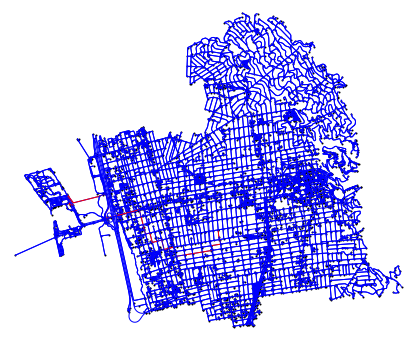

<Figure size 432x288 with 0 Axes>

In [118]:
ec = ['r' if (check_if_is_in(shortest_path_distance, u, v)) else 'b' for u, v, k in graph.edges(keys=True)]
fig, ax = ox.plot_graph(graph, node_color='w', node_edgecolor='k', node_size=1, node_zorder=0, edge_color=ec, edge_linewidth=1)
plt.tight_layout()

In [3]:
import osmnx as ox
ox.footprints.plot_footprints(graph, fig=fig, ax = ax, filename='smallest_danger_sample.png',file_format='png',
                            )

NameError: name 'graph' is not defined

In [117]:
shortest_path_distance

[1762740812,
 258884723,
 53020958,
 53082735,
 240469785,
 240469619,
 53050621,
 5484498048,
 53047287,
 53085602,
 53085601,
 53085641,
 243670956,
 53085639,
 53082730,
 5484498179,
 53020933,
 53020930,
 53020929,
 53055494,
 53063572,
 53063570,
 343627788,
 53029737,
 5484498260,
 5484498270,
 5484498268,
 53029736,
 53029733,
 240448872,
 53029731,
 240448811,
 52987320,
 52991882,
 52995542,
 86333300,
 53091888,
 86333227,
 6612677233,
 6612677235,
 306067575,
 87337141,
 87353816,
 361213185,
 4927326213,
 4927326195,
 4927326193,
 361213403,
 4927326194]